In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import seaborn as sns
from scipy.stats import norm, pearsonr, spearmanr
import scipy.stats as stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

sns.set_context("paper")
simHei = FontProperties(fname=r'/usr/share/fonts/Chinses/simhei.ttf', size=10) 

In [3]:
FDR_THRESHOLD = 0.05 # 差异阈值
RANDOM_SEED = 0

In [4]:
met_data = pd.read_csv('../data/Preprocess/rawdata_metabolism_abundance.tsv', index_col=0, sep='\t')
met_names = pd.read_csv('../data/Preprocess/rawdata_metabolism_chemicals.tsv', index_col=0, sep='\t')
met_data.head()

,PP99_1,N579,PP02_1,PP65_1,PP01_1,PP09_1,N621,PP117_1,PP80_1,N556,...,N628,PP140_1,N564,N607,PP37_1,N569,N568,PP125_1,N540,PP41_1
pos_metabolite_ID,,,,,,,,,,,,,,,,,,,,,
POS_7,0.002677,0.003906,0.033713,0.003538,0.003946,0.005640,0.018363,0.007910,0.009438,0.014900,...,0.000592,0.001799,0.000235,0.006882,0.000397,0.003298,0.003726,0.046869,0.001400,0.001445
POS_8,0.010665,0.038386,0.079751,0.015239,0.006436,0.017229,0.050683,0.003340,0.005866,0.004384,...,0.044877,0.003442,0.020886,0.041815,0.004280,0.016329,0.042281,0.038650,0.036096,0.004707
POS_10,0.067654,0.000701,0.000889,0.076852,0.071915,0.000511,0.000658,0.263614,0.002931,0.001440,...,0.000799,0.052581,0.000566,0.000609,0.020760,0.000765,0.000590,0.000604,0.001438,0.058367
POS_24,0.014283,0.019426,0.013160,0.013827,0.053086,0.012890,0.017034,0.024071,0.010854,0.017674,...,0.011142,0.016451,0.014555,0.011066,0.009294,0.019891,0.019811,0.018014,0.009332,0.010964
POS_26,0.025595,0.013861,0.018086,0.008634,0.017666,0.015677,0.025903,0.016628,0.011860,0.017793,...,0.015193,0.016763,0.032790,0.029224,0.019837,0.036657,0.024904,0.040068,0.031997,0.011772


### ASV

In [5]:
asv_data = pd.read_csv('../data/Preprocess/rawdata_16S_abundance.tsv', index_col=0, sep='\t')
taxa_data = pd.read_csv('../data/Preprocess/rawdata_16S_taxa.tsv', index_col=0, sep='\t')

In [6]:
statistic_asv = pd.read_csv('Microbiome/differential_asv.csv', index_col=0)
sigs = (statistic_asv['FDR']<=FDR_THRESHOLD)
statistic_asv = statistic_asv.loc[sigs, :].sort_values(['FDR'])
'差异ASV:', statistic_asv.shape[0]

('差异ASV:', 45)

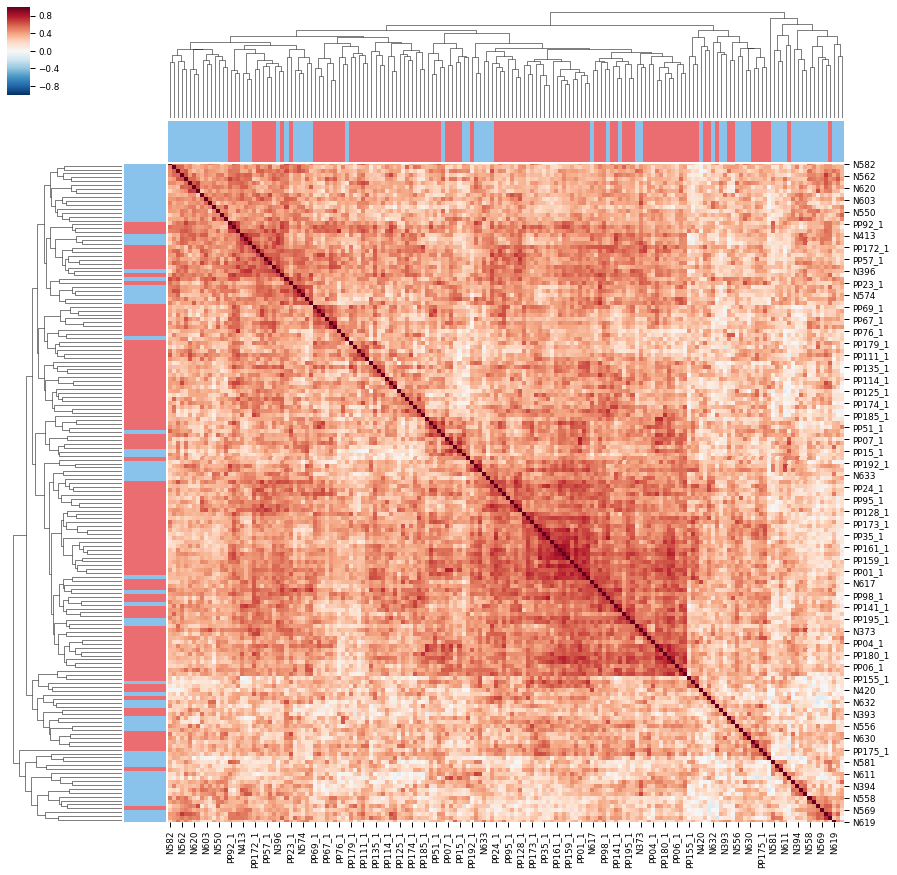

In [107]:
temp = asv_data.loc[statistic_asv.index, :]
temp.index = statistic_asv['Name']
###
colors = ['#89c3eb' if i[0]=='N' else '#ec6d71' for i in temp.columns]
r_matrix, p_matrix = correlation_analysis(temp, by='columns', method=spearmanr, sampling=0)
_ = sns.clustermap(r_matrix, metric='euclidean', cmap='RdBu_r', vmin=-1, vmax=1, row_colors=colors, col_colors=colors, figsize = (15, 15))
_ = g.ax_heatmap.set_ylim(r_matrix.shape[0], -0.0)
_ = plt.show()

### Subtype

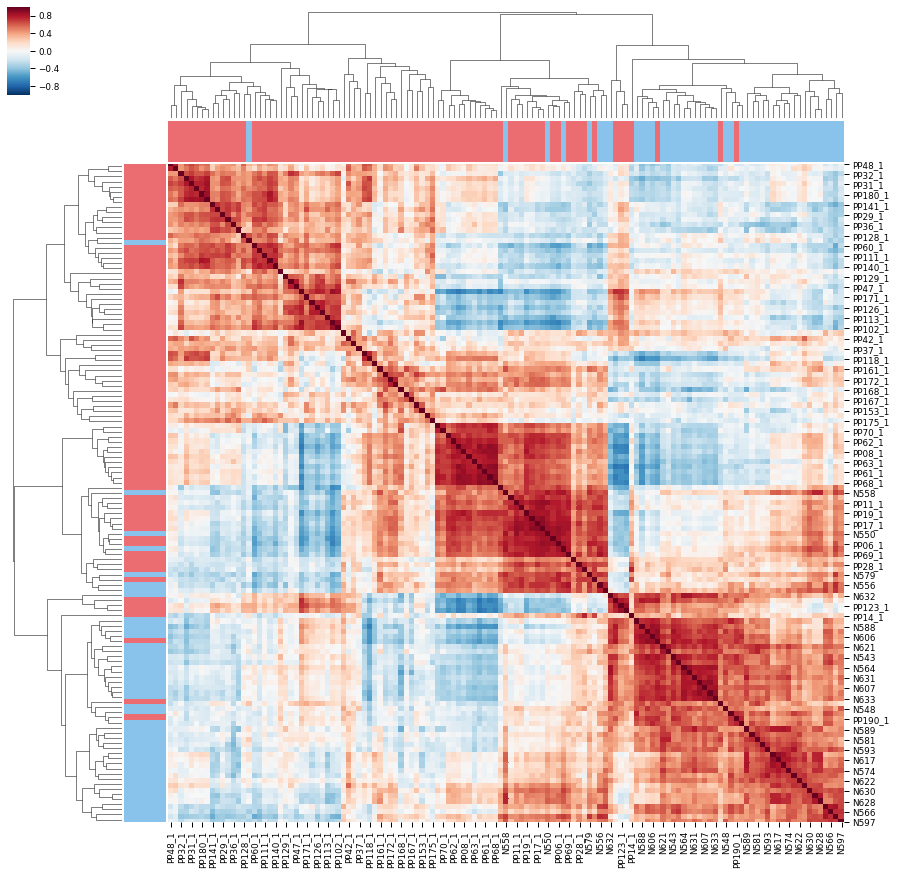

In [106]:
statistics = pd.read_csv('Metabolism/differential_untargeted_met.csv', index_col=0)
sigs = (statistics['FDR']<=0.05)
statistics = statistics.loc[sigs, :].sort_values(['FDR'])
temp = met_data.loc[statistics.index, :]
temp.index = statistics['Name']
###
colors = ['#89c3eb' if i[0]=='N' else '#ec6d71' for i in temp.columns]
r_matrix, p_matrix = correlation_analysis(temp, by='columns', method=spearmanr, sampling=0)
g = sns.clustermap(r_matrix, metric='euclidean', cmap='RdBu_r', vmin=-1, vmax=1, row_colors=colors, col_colors=colors, figsize = (15, 15))
_ = plt.show()

In [7]:
#np.array(temp.columns)[g.dendrogram_row.reordered_ind]
subtype1 = ['PP48_1', 'PP49_1', 'PP32_1', 'PP22_1', 'PP31_1', 'PP82_1',
           'PP180_1', 'PP41_1', 'PP141_1', 'PP148_1', 'PP29_1', 'PP109_1',
           'PP36_1', 'PP95_1', 'PP128_1', 'PP60_1', 'PP117_1',
           'PP111_1', 'PP40_1', 'PP140_1', 'PP91_1', 'PP129_1', 'PP80_1',
           'PP47_1', 'PP74_1', 'PP171_1', 'PP139_1', 'PP126_1', 'PP142_1',
           'PP113_1', 'PP79_1', 'PP102_1'] # 左上
subtype2 = ['PP01_1', 'PP70_1', 'PP110_1',
           'PP62_1', 'PP56_1', 'PP08_1', 'PP66_1', 'PP63_1', 'PP67_1',
           'PP61_1', 'PP65_1', 'PP68_1', 'PP05_1', 'PP100_1',
           'PP11_1', 'PP51_1', 'PP19_1', 'PP03_1', 'PP17_1', 'PP54_1', 
           'PP09_1', 'PP06_1', 'PP69_1', 'PP23_1', 'PP28_1', 'PP15_1',
           'PP02_1', ] # 右下
subtype3 = ['PP150_1', 'PP42_1', 'PP149_1',
           'PP37_1', 'PP179_1', 'PP118_1', 'PP86_1', 'PP161_1', 'PP173_1',
           'PP172_1', 'PP152_1', 'PP168_1', 'PP160_1', 'PP167_1', 'PP92_1',
           'PP153_1', 'PP99_1', 'PP175_1'] # 中间
normal = [i for i in met_data.columns if 'N'==i[0]]

In [8]:
met_score = pd.read_csv('sign_recheck/3. Metabolism_EFA_scores_signcheck.csv', index_col=0)
met_score['Subtype'] = ['S1' if i in subtype1 else ('S2' if i in subtype2 else ('S3' if i in subtype3 else ('Normal' if i in normal else 'Others'))) for i in met_score.index]
met_score.head(2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Subtype
PP99_1,0.275472,1.351216,0.483061,-0.162414,0.005194,0.169691,0.512020,0.020402,-1.526877,0.001940,-0.677756,-0.024090,S3
N579,-1.027638,-0.523729,-0.947366,-0.775569,0.544164,-0.772273,-0.540699,0.047579,0.434538,0.882936,-0.963075,0.771605,Normal


In [9]:
asv_score = pd.read_csv('sign_recheck/2. Microbiome_EFA_scores_signcheck.csv', index_col=0)
asv_score['Subtype'] = ['S1' if i in subtype1 else ('S2' if i in subtype2 else ('S3' if i in subtype3 else ('Normal' if i in normal else 'Others'))) for i in asv_score.index]
asv_score.head(2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Subtype
N579,-0.665557,-0.820041,-0.399921,-0.056793,0.035901,-0.270819,0.516100,-2.455632,-0.681603,-0.511622,Normal
PP196_1,-0.328341,-0.363620,-0.328872,-0.161272,-0.366253,-0.529614,0.066497,-0.078641,0.032062,0.006877,Others


('Factor1',
 9.581186905356025e-10,
 0.0006361594424557884,
 0.0028016101801627198)

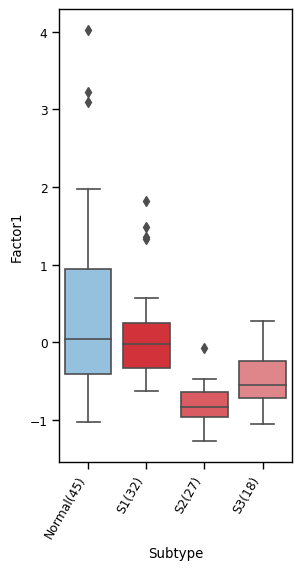

('Factor2', 0.021596426943583196, 0.0027781726845616836, 0.4726239197718075)

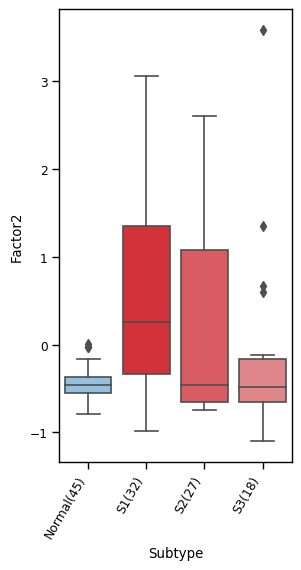

('Factor3', 0.8551321405847059, 0.03057124057215689, 0.14439979221307134)

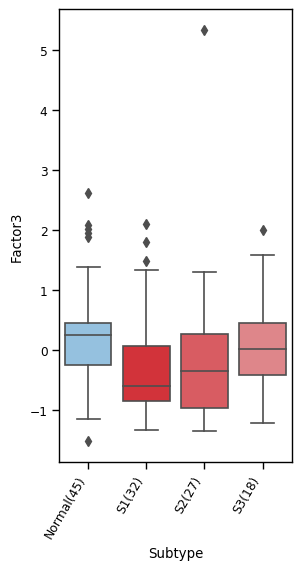

('Factor4',
 1.3580468700333174e-10,
 0.043266287956991244,
 3.9993699670131957e-08)

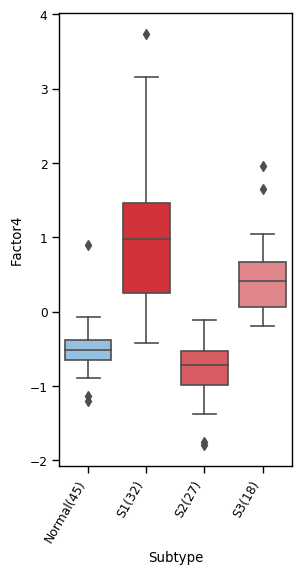

('Factor5', 0.420029931048421, 0.6565736867184698, 0.963042018689996)

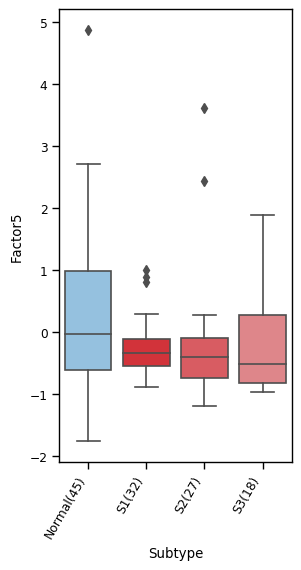

('Factor6', 0.5327621350976893, 0.454569836470039, 0.17164792926556227)

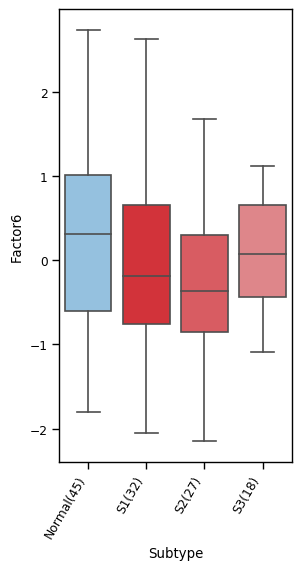

('Factor7', 0.784191229401619, 0.6712468909747564, 0.8348273291852392)

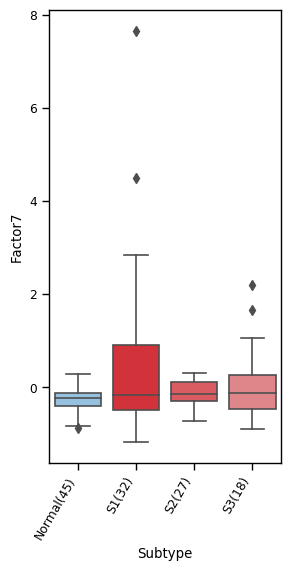

('Factor8', 0.009276778720421583, 0.1571297408455193, 0.16449969933310915)

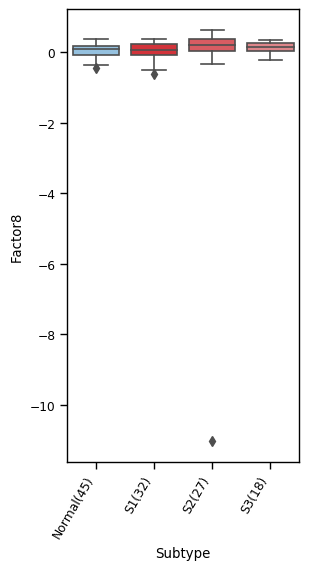

('Factor9', 0.012589305820077548, 0.0027781726845616836, 0.06381624546533513)

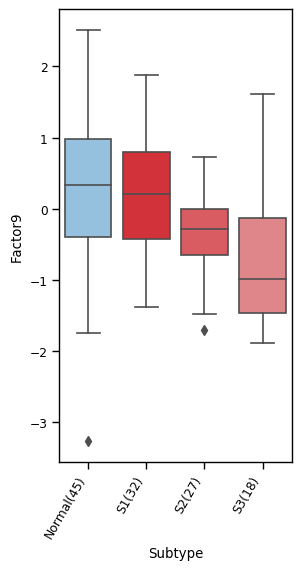

('Factor10', 0.5327621350976893, 0.40729490983741834, 0.09078265443367234)

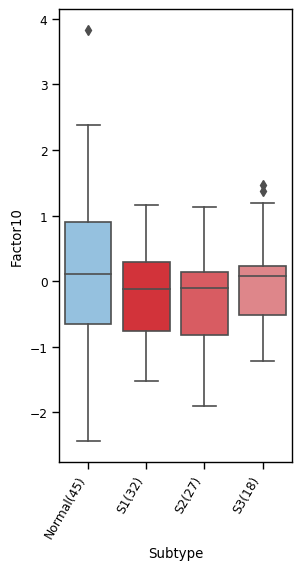

('Factor11', 0.14835146680826944, 0.8874914582071527, 0.08227777272211645)

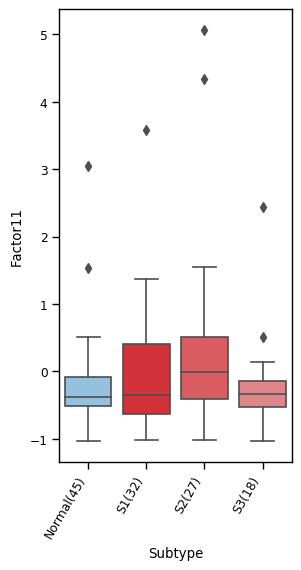

('Factor12', 0.13999544193327598, 0.9516507699020015, 0.36622745407299717)

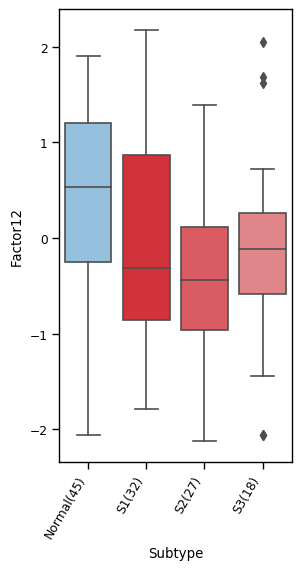

In [146]:
from scipy.stats import fisher_exact, ranksums
import statsmodels.stats.multitest as multi

result = []
colors = ['#89c3eb', '#ed1822', '#ed474f', '#ed777d', '#eda6aa']
for f in met_score.columns:
    if f=='Subtype':
        continue
    _, p12 = ranksums(met_score.loc[met_score['Subtype']=='S1', f], met_score.loc[met_score['Subtype']=='S2', f])
    _, p13 = ranksums(met_score.loc[met_score['Subtype']=='S1', f], met_score.loc[met_score['Subtype']=='S3', f])
    _, p23 = ranksums(met_score.loc[met_score['Subtype']=='S2', f], met_score.loc[met_score['Subtype']=='S3', f])
    f, p12, p13, p23
    result.append([f, (met_score['Subtype']=='Normal').sum(), (met_score['Subtype']=='S1').sum(), 
                   (met_score['Subtype']=='S2').sum(), (met_score['Subtype']=='S3').sum(), 
                   (met_score['Subtype']=='Others').sum(), met_score.loc[met_score['Subtype']=='Normal', f].mean(), 
                   met_score.loc[met_score['Subtype']=='S1', f].mean(), met_score.loc[met_score['Subtype']=='S2', f].mean(),
                   met_score.loc[met_score['Subtype']=='S3', f].mean(), met_score.loc[met_score['Subtype']=='Others', f].mean(), 
                   p12, p23, p13])
    _ = plt.figure(figsize=(3, 6), dpi=100)
    _ = sns.boxplot(x="Subtype", y=f, data=met_score, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
    _ = plt.xticks([0, 1, 2, 3],
                   ['Normal('+str((met_score['Subtype']=='Normal').sum())+')', 
                    'S1('+str((met_score['Subtype']=='S1').sum())+')', 
                    'S2('+str((met_score['Subtype']=='S2').sum())+')', 
                    'S3('+str((met_score['Subtype']=='S3').sum())+')', 
                    ], rotation=60, ha='right')
    _ = plt.show()
result = pd.DataFrame(result, columns=['Factor', 'N_nor', 'N_S1', 'N_S2', 'N_S3', 'N_Others', 
                                       'Mean_nor', 'Mean_S1', 'Mean_S2', 'Mean_S3', 'Mean_Others', 
                                       'p_S1_vs_S2', 'p_S2_vs_S3', 'p_S1_vs_S3'])
result.to_csv('subtypes/met_fa_diff_in_sbutypes.csv')

### Met 显著子图

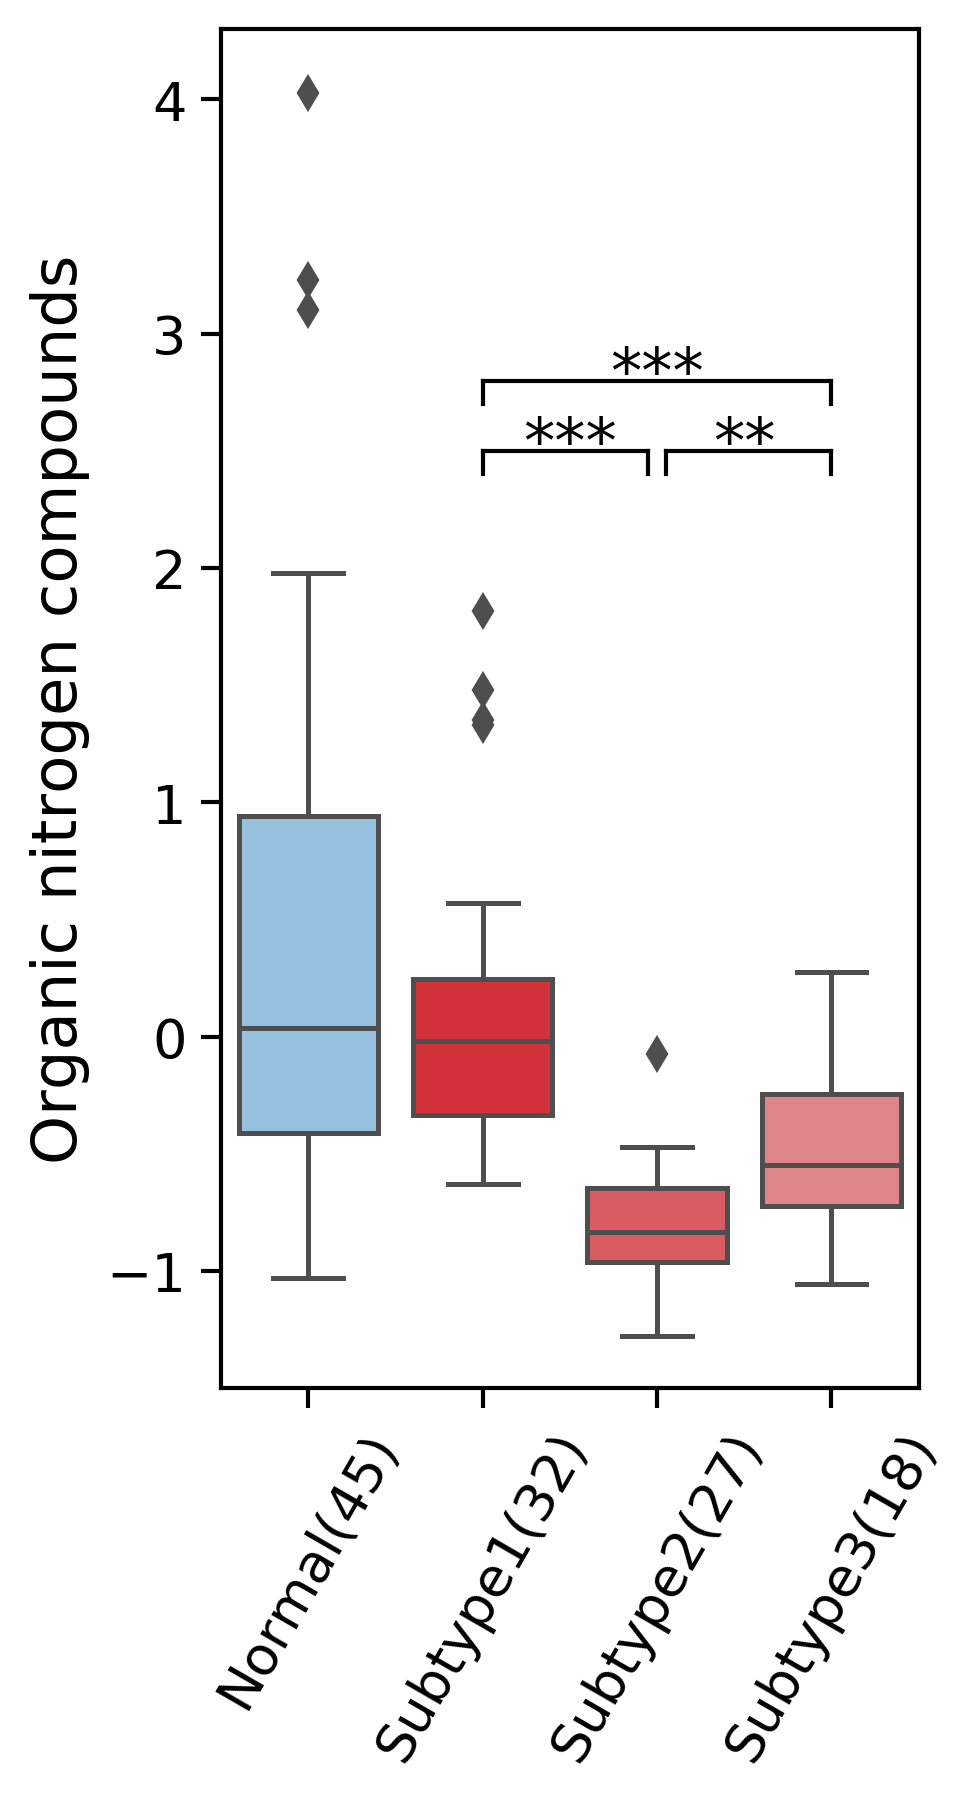

In [199]:
f = 'Factor1'
_ = plt.figure(figsize=(3, 6), dpi=300)
_ = sns.boxplot(x="Subtype", y=f, data=met_score, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
_ = plt.xticks([0, 1, 2, 3],
               ['Normal('+str((met_score['Subtype']=='Normal').sum())+')', 
                'Subtype1('+str((met_score['Subtype']=='S1').sum())+')', 
                'Subtype2('+str((met_score['Subtype']=='S2').sum())+')', 
                'Subtype3('+str((met_score['Subtype']=='S3').sum())+')', 
                ], rotation=60, fontsize=13)
_ = plt.yticks(fontsize = 13)
_ = plt.ylabel('Organic nitrogen compounds', fontsize = 15)
_ = plt.xlabel('')

_ = plt.plot([1, 1.95], [2.5, 2.5], lw=1., c='k')
_ = plt.plot([1, 1], [2.4, 2.5], lw=1., c='k')
_ = plt.plot([1.95, 1.95], [2.4, 2.5], lw=1., c='k')
_ = plt.annotate('***', (1.5, 2.45), ha="center", fontsize=15)

_ = plt.plot([2.05, 3], [2.5, 2.5], lw=1., c='k')
_ = plt.plot([2.05, 2.05], [2.4, 2.5], lw=1., c='k')
_ = plt.plot([3, 3], [2.4, 2.5], lw=1., c='k')
_ = plt.annotate('**', (2.5, 2.45), ha="center", fontsize=15)

_ = plt.plot([1, 3], [2.8, 2.8], lw=1., c='k')
_ = plt.plot([1, 1], [2.7, 2.8], lw=1., c='k')
_ = plt.plot([3, 3], [2.7, 2.8], lw=1., c='k')
_ = plt.annotate('***', (2, 2.75), ha="center", fontsize=15)



_ = plt.ylim(-1.5, 4.3)
_ = plt.show()

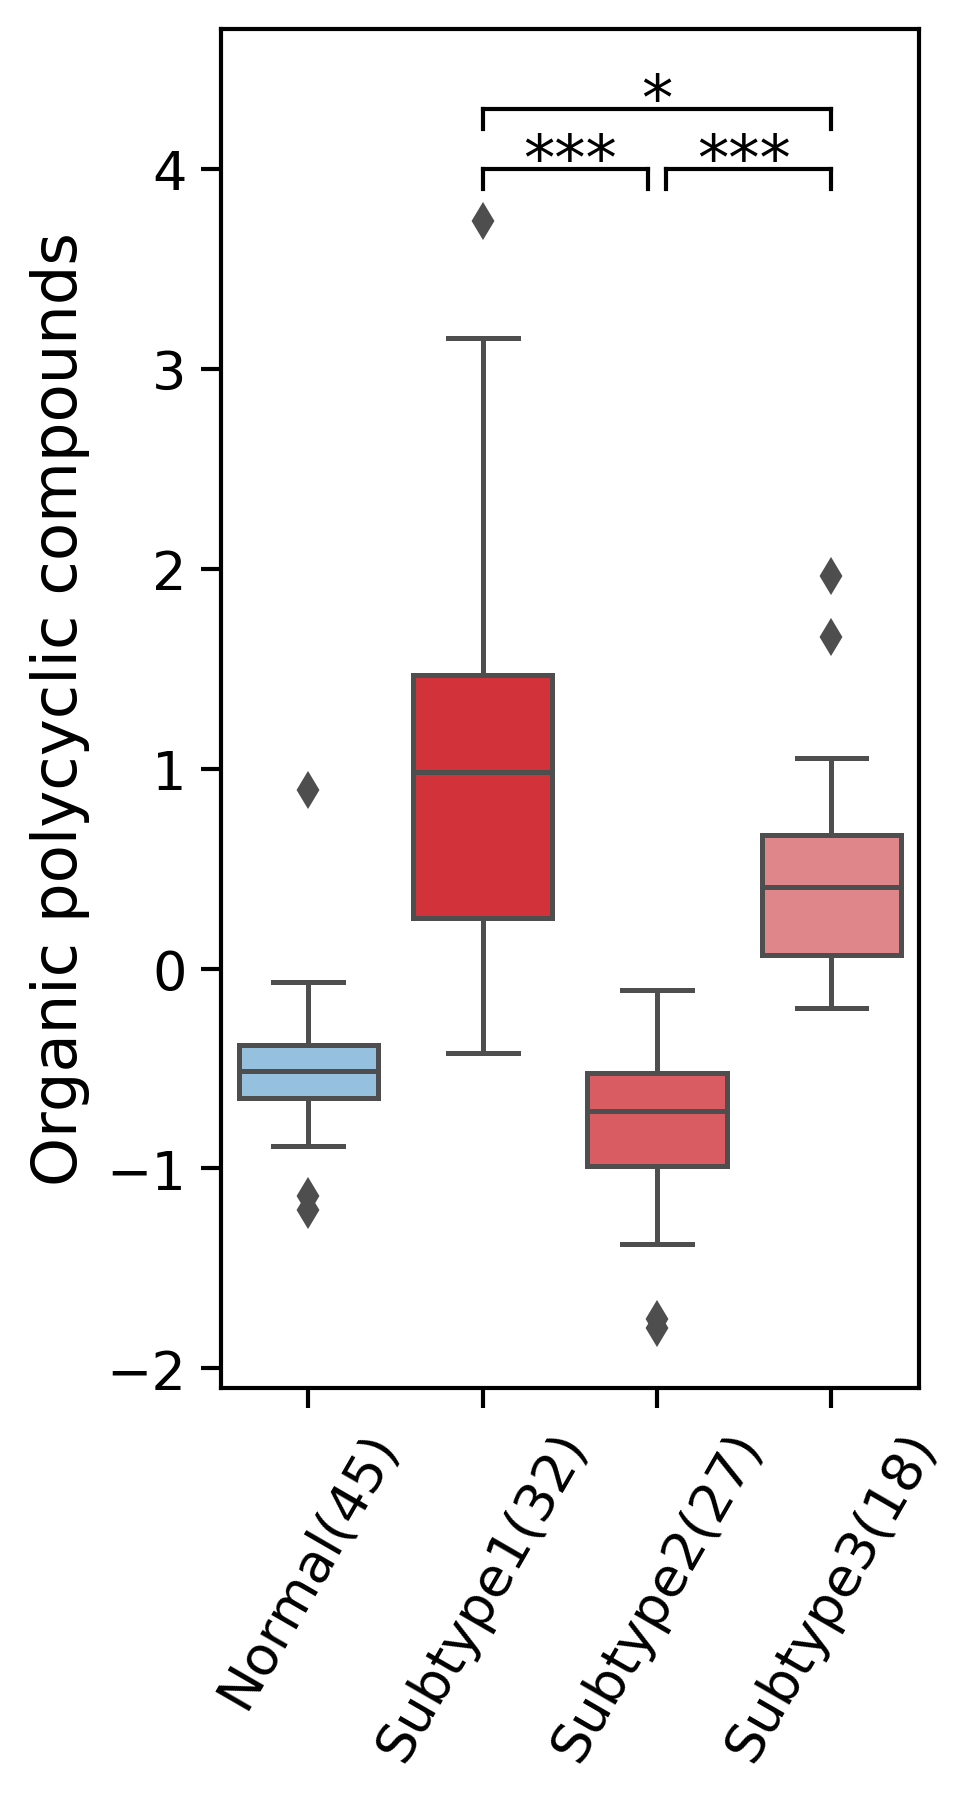

In [201]:
f = 'Factor4'
_ = plt.figure(figsize=(3, 6), dpi=300)
_ = sns.boxplot(x="Subtype", y=f, data=met_score, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
_ = plt.xticks([0, 1, 2, 3],
               ['Normal('+str((met_score['Subtype']=='Normal').sum())+')', 
                'Subtype1('+str((met_score['Subtype']=='S1').sum())+')', 
                'Subtype2('+str((met_score['Subtype']=='S2').sum())+')', 
                'Subtype3('+str((met_score['Subtype']=='S3').sum())+')', 
                ], rotation=60, fontsize=13)
_ = plt.yticks(fontsize = 13)
_ = plt.ylabel('Organic polycyclic compounds', fontsize = 15)
_ = plt.xlabel('')

_ = plt.plot([1, 1.95], [4, 4], lw=1., c='k')
_ = plt.plot([1, 1], [3.9, 4], lw=1., c='k')
_ = plt.plot([1.95, 1.95], [3.9, 4], lw=1., c='k')
_ = plt.annotate('***', (1.5, 3.95), ha="center", fontsize=15)

_ = plt.plot([2.05, 3], [4, 4], lw=1., c='k')
_ = plt.plot([2.05, 2.05], [3.9, 4], lw=1., c='k')
_ = plt.plot([3, 3], [3.9, 4], lw=1., c='k')
_ = plt.annotate('***', (2.5, 3.95), ha="center", fontsize=15)

_ = plt.plot([1, 3], [4.3, 4.3], lw=1., c='k')
_ = plt.plot([1, 1], [4.2, 4.3], lw=1., c='k')
_ = plt.plot([3, 3], [4.2, 4.3], lw=1., c='k')
_ = plt.annotate('*', (2, 4.25), ha="center", fontsize=15)



_ = plt.ylim(-2.1, 4.7)
_ = plt.show()

('Factor1', 0.4598216893765392, 0.04747225514291817, 0.32960960546565643)

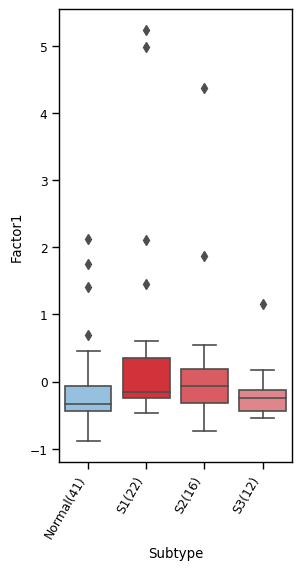

('Factor2', 0.7227488403087508, 0.7456825420836933, 0.5461695654428671)

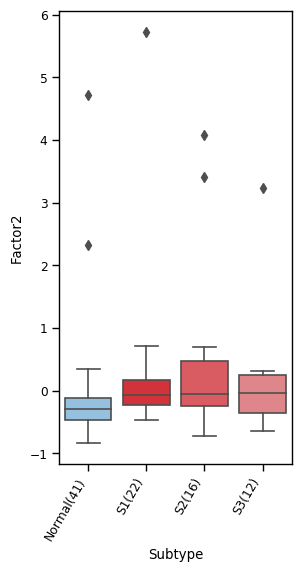

('Factor3', 0.13933258375153862, 0.03660209017913067, 0.5774686624272996)

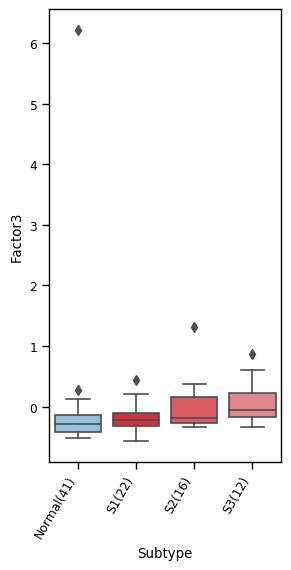

('Factor4', 0.5742885595278, 0.06607531108982742, 0.07021370656326112)

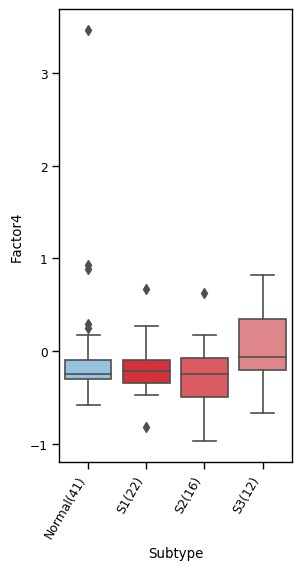

('Factor5', 0.2488860979807992, 0.5642097153338764, 0.8164454538372501)

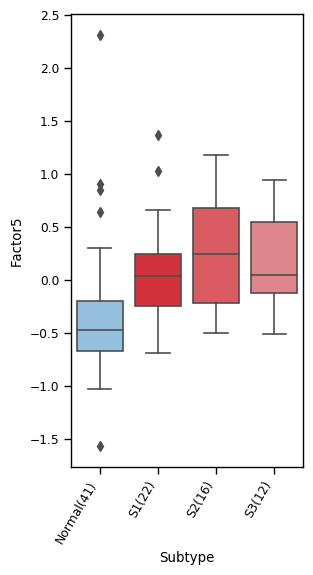

('Factor6', 0.6574154749020114, 0.7185667307022461, 0.5774686624272996)

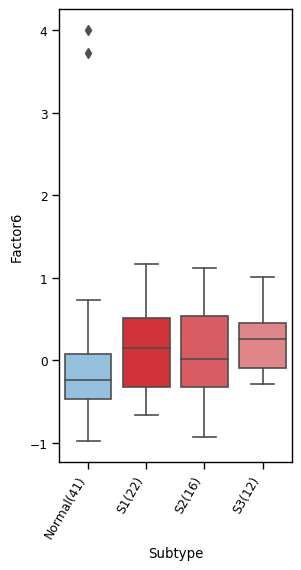

('Factor7', 0.015334515530047183, 0.5642097153338764, 0.1373948258558008)

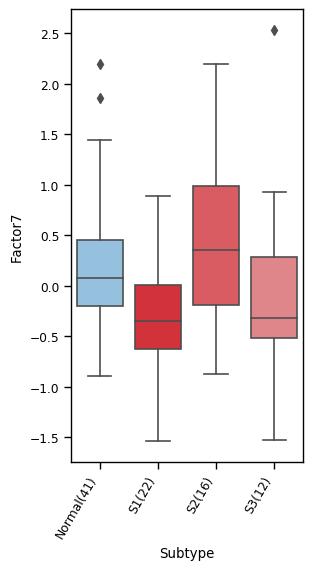

('Factor8', 0.8360416140543458, 0.800838179706995, 0.6095876276113379)

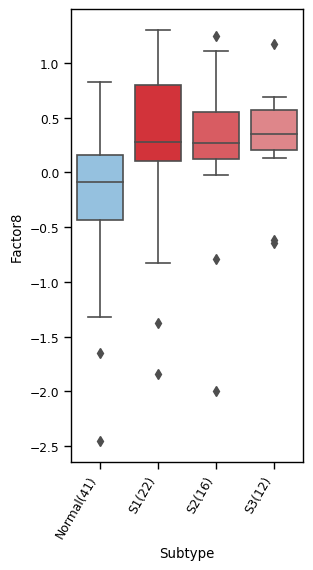

('Factor9', 0.7450131972413343, 0.44917720161029007, 0.8892356072063257)

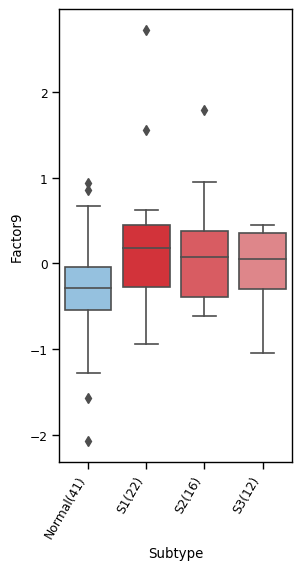

('Factor10', 0.4598216893765392, 0.00441385778107854, 0.009329584719771562)

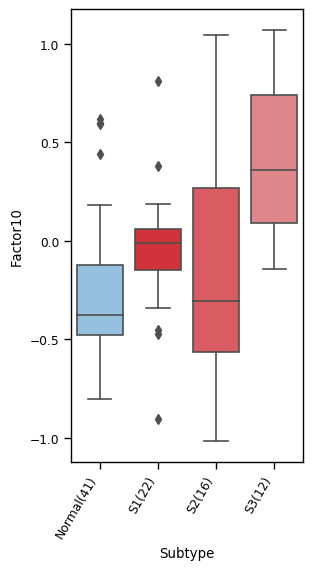

In [139]:
from scipy.stats import fisher_exact, ranksums
import statsmodels.stats.multitest as multi

result = []
colors = ['#89c3eb', '#ed1822', '#ed474f', '#ed777d', '#eda6aa']
for f in asv_score.columns:
    if f=='Subtype':
        continue
    _, p12 = ranksums(asv_score.loc[asv_score['Subtype']=='S1', f], asv_score.loc[asv_score['Subtype']=='S2', f])
    _, p13 = ranksums(asv_score.loc[asv_score['Subtype']=='S1', f], asv_score.loc[asv_score['Subtype']=='S3', f])
    _, p23 = ranksums(asv_score.loc[asv_score['Subtype']=='S2', f], asv_score.loc[asv_score['Subtype']=='S3', f])
    f, p12, p13, p23
    result.append([f, (asv_score['Subtype']=='Normal').sum(), (asv_score['Subtype']=='S1').sum(), 
                   (asv_score['Subtype']=='S2').sum(), (asv_score['Subtype']=='S3').sum(), 
                   (asv_score['Subtype']=='Others').sum(), asv_score.loc[asv_score['Subtype']=='Normal', f].mean(), 
                   asv_score.loc[asv_score['Subtype']=='S1', f].mean(), asv_score.loc[asv_score['Subtype']=='S2', f].mean(),
                   asv_score.loc[asv_score['Subtype']=='S3', f].mean(), asv_score.loc[asv_score['Subtype']=='Others', f].mean(), 
                   p12, p23, p13])
    _ = plt.figure(figsize=(3, 6), dpi=100)
    _ = sns.boxplot(x="Subtype", y=f, data=asv_score, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
    _ = plt.xticks([0, 1, 2, 3],
                   ['Normal('+str((asv_score['Subtype']=='Normal').sum())+')', 
                    'S1('+str((asv_score['Subtype']=='S1').sum())+')', 
                    'S2('+str((asv_score['Subtype']=='S2').sum())+')', 
                    'S3('+str((asv_score['Subtype']=='S3').sum())+')', 
                    ], rotation=60, ha='right')
    _ = plt.show()
result = pd.DataFrame(result, columns=['Factor', 'N_nor', 'N_S1', 'N_S2', 'N_S3', 'N_Others', 
                                       'Mean_nor', 'Mean_S1', 'Mean_S2', 'Mean_S3', 'Mean_Others', 
                                       'p_S1_vs_S2', 'p_S2_vs_S3', 'p_S1_vs_S3'])
result.to_csv('subtypes/asv_fa_diff_in_sbutypes.csv')

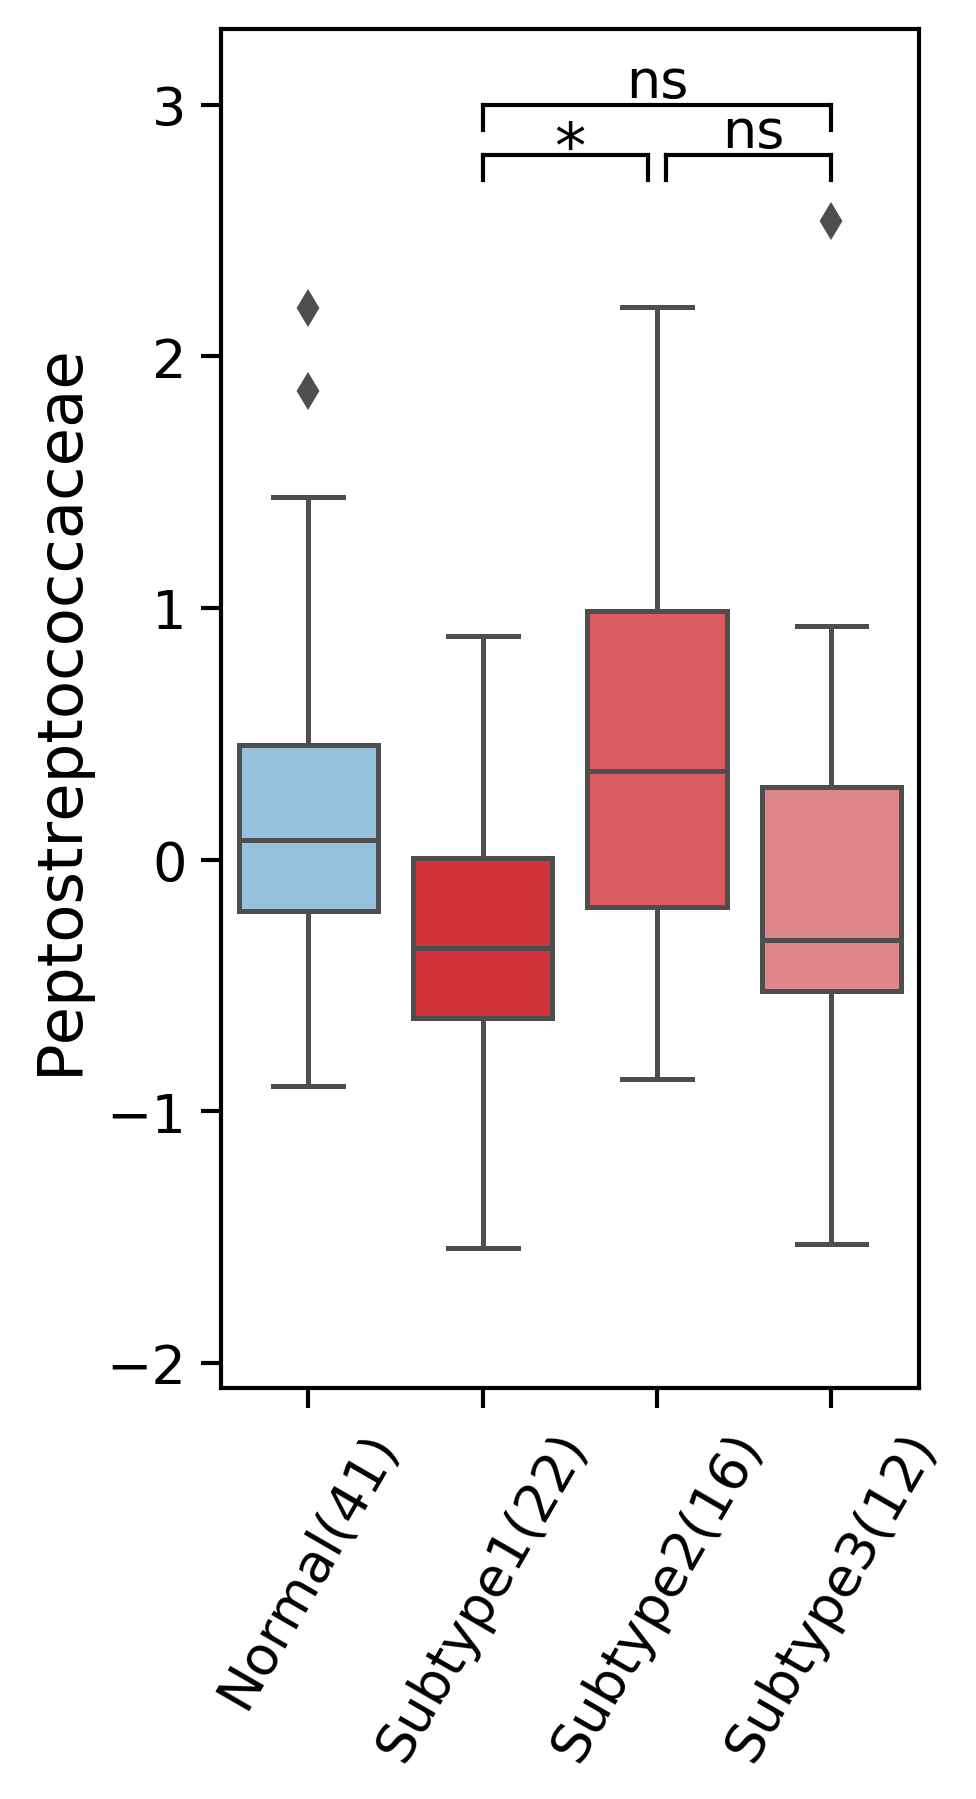

In [235]:
f = 'Factor7'
_ = plt.figure(figsize=(3, 6), dpi=300)
_ = sns.boxplot(x="Subtype", y=f, data=asv_score, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
_ = plt.xticks([0, 1, 2, 3],
               ['Normal('+str((asv_score['Subtype']=='Normal').sum())+')', 
                'Subtype1('+str((asv_score['Subtype']=='S1').sum())+')', 
                'Subtype2('+str((asv_score['Subtype']=='S2').sum())+')', 
                'Subtype3('+str((asv_score['Subtype']=='S3').sum())+')', 
                ], rotation=60, fontsize=13)
_ = plt.yticks(fontsize = 13)
_ = plt.ylabel('Peptostreptococcaceae', fontsize = 15)
_ = plt.xlabel('')

_ = plt.plot([1, 1.95], [2.8, 2.8], lw=1., c='k')
_ = plt.plot([1, 1], [2.7, 2.8], lw=1., c='k')
_ = plt.plot([1.95, 1.95], [2.7, 2.8], lw=1., c='k')
_ = plt.annotate('*', (1.5, 2.75), ha="center", fontsize=15)

_ = plt.plot([2.05, 3], [2.8, 2.8], lw=1., c='k')
_ = plt.plot([2.05, 2.05], [2.7, 2.8], lw=1., c='k')
_ = plt.plot([3, 3], [2.7, 2.8], lw=1., c='k')
_ = plt.annotate('ns', (2.55, 2.83), ha="center", fontsize=13)

_ = plt.plot([1, 3], [3, 3], lw=1., c='k')
_ = plt.plot([1, 1], [2.9, 3], lw=1., c='k')
_ = plt.plot([3, 3], [2.9, 3], lw=1., c='k')
_ = plt.annotate('ns', (2, 3.03), ha="center", fontsize=13)

_ = plt.ylim(-2.1, 3.3)
_ = plt.show()

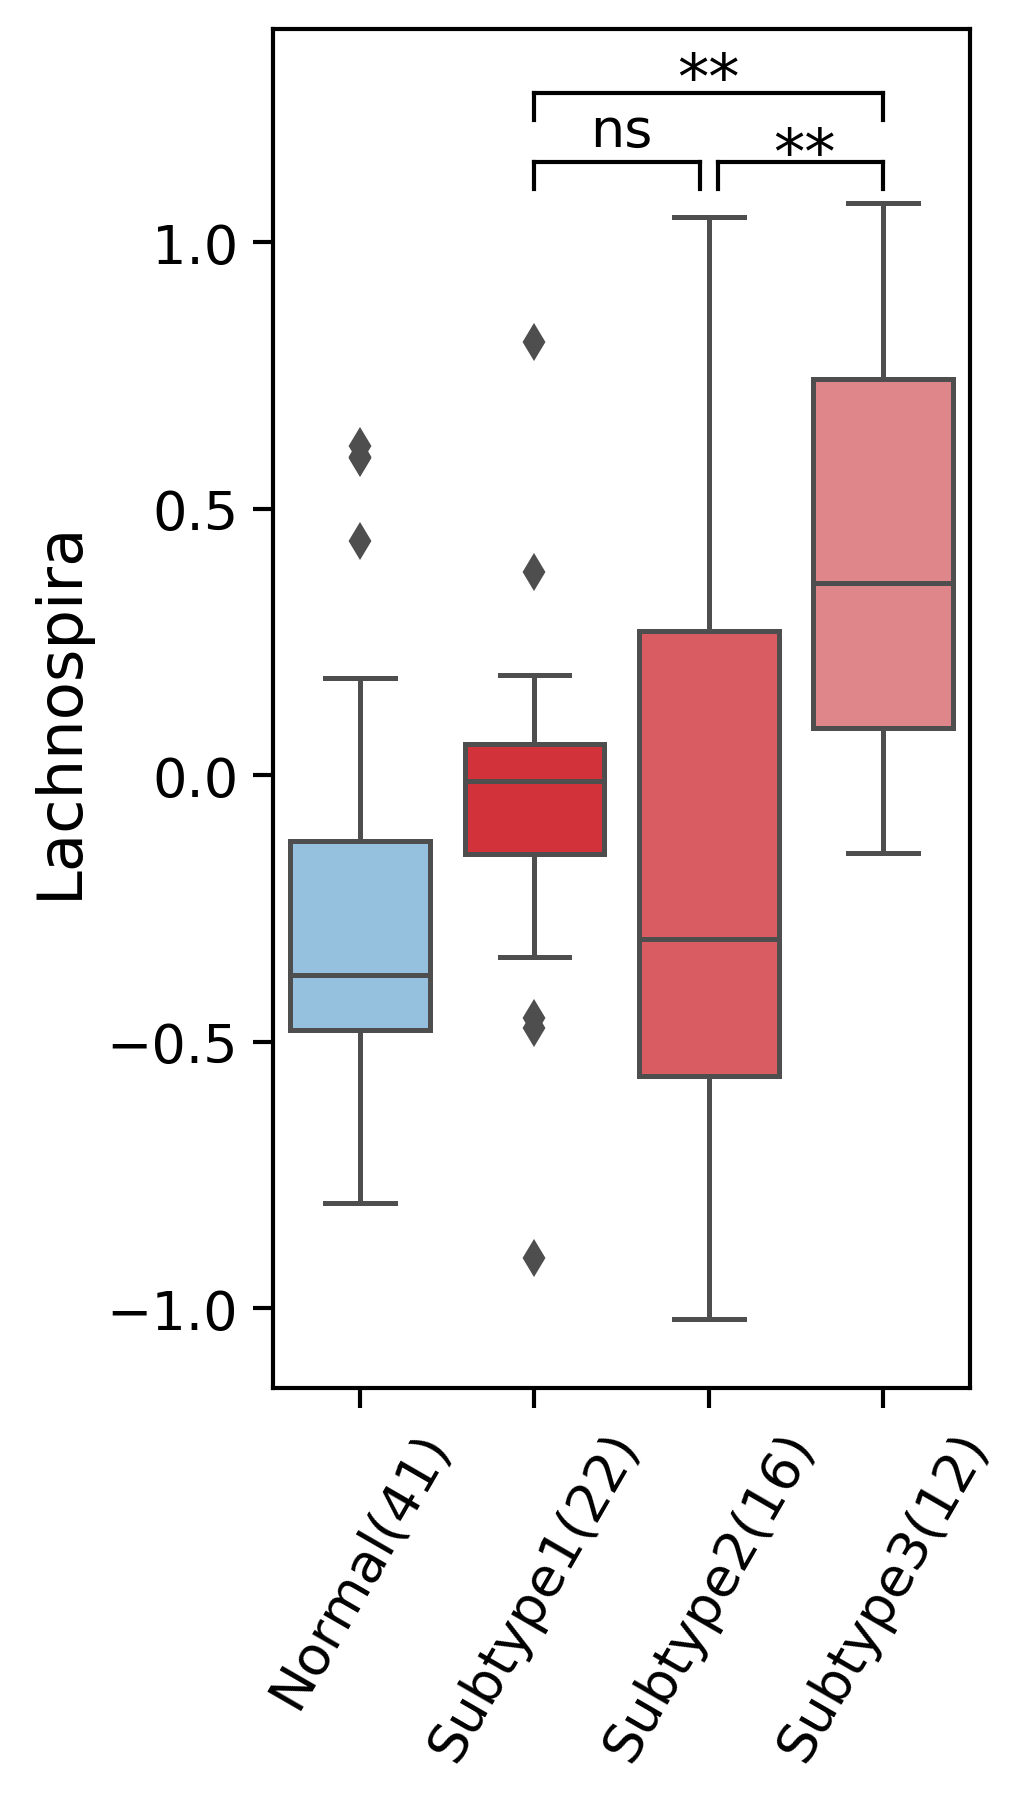

In [246]:
f = 'Factor10'
_ = plt.figure(figsize=(3, 6), dpi=300)
_ = sns.boxplot(x="Subtype", y=f, data=asv_score, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
_ = plt.xticks([0, 1, 2, 3],
               ['Normal('+str((asv_score['Subtype']=='Normal').sum())+')', 
                'Subtype1('+str((asv_score['Subtype']=='S1').sum())+')', 
                'Subtype2('+str((asv_score['Subtype']=='S2').sum())+')', 
                'Subtype3('+str((asv_score['Subtype']=='S3').sum())+')', 
                ], rotation=60, fontsize=13)
_ = plt.yticks(fontsize = 13)
_ = plt.ylabel('Lachnospira', fontsize = 15)
_ = plt.xlabel('')

_ = plt.plot([1, 1.95], [1.15, 1.15], lw=1., c='k')
_ = plt.plot([1, 1], [1.1, 1.15], lw=1., c='k')
_ = plt.plot([1.95, 1.95], [1.1, 1.15], lw=1., c='k')
_ = plt.annotate('ns', (1.5, 1.18), ha="center", fontsize=13)

_ = plt.plot([2.05, 3], [1.15, 1.15], lw=1., c='k')
_ = plt.plot([2.05, 2.05], [1.1, 1.15], lw=1., c='k')
_ = plt.plot([3, 3], [1.1, 1.15], lw=1., c='k')
_ = plt.annotate('**', (2.55, 1.13), ha="center", fontsize=15)

_ = plt.plot([1, 3], [1.28, 1.28], lw=1., c='k')
_ = plt.plot([1, 1], [1.23, 1.28], lw=1., c='k')
_ = plt.plot([3, 3], [1.23, 1.28], lw=1., c='k')
_ = plt.annotate('**', (2, 1.27), ha="center", fontsize=15)

_ = plt.ylim(-1.15, 1.4)
_ = plt.show()

### Phenotype

In [130]:
food_score = pd.read_csv('sign_recheck/4. Food_EFA_scores_signcheck.csv', index_col=0)
food_score['Subtype'] = ['S1' if i in subtype1 else ('S2' if i in subtype2 else ('S3' if i in subtype3 else ('Normal' if i in normal else 'Others'))) for i in food_score.index]
food_score.head(2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Subtype
PP161_1,-0.097246,-1.683213,-0.409418,0.074778,-0.939677,-1.062458,-0.657217,-0.499294,0.083817,S3
PP174_1,0.241026,0.387171,0.625336,-0.011227,1.376697,-0.829642,-0.167608,-0.287215,-0.664561,Others


('Factor1', 0.06407750645105952, 0.25683925795785656, 0.07898257926378298)

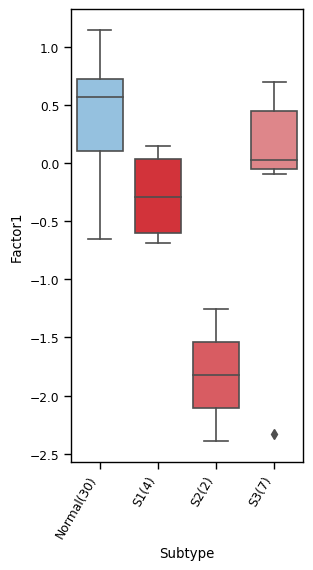

('Factor2', 0.16491482255330148, 1.0, 0.14323490752466972)

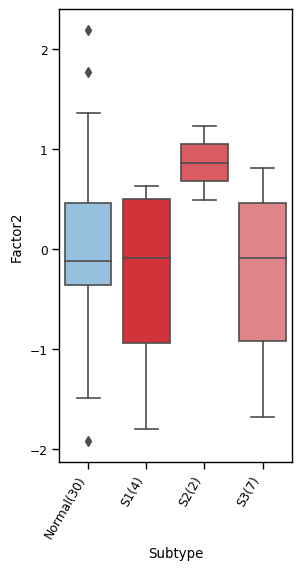

('Factor3', 0.6434288435636205, 1.0, 1.0)

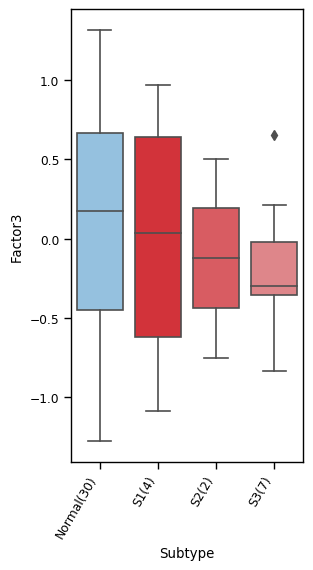

('Factor4', 0.3545394797735013, 0.8501067391385259, 0.07898257926378298)

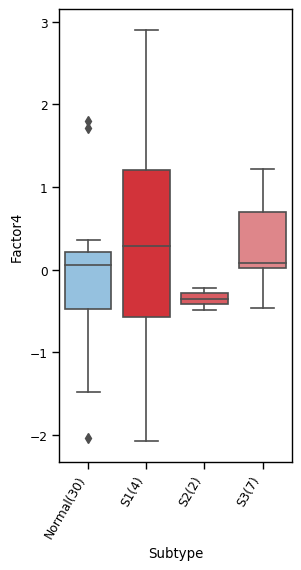

('Factor5', 0.3545394797735013, 0.25683925795785656, 0.5581846494226572)

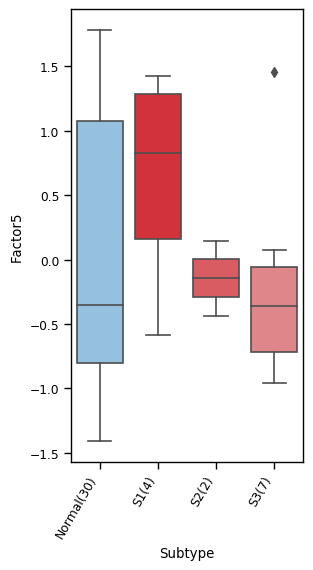

('Factor6', 1.0, 0.3447042220069576, 0.7696979437812898)

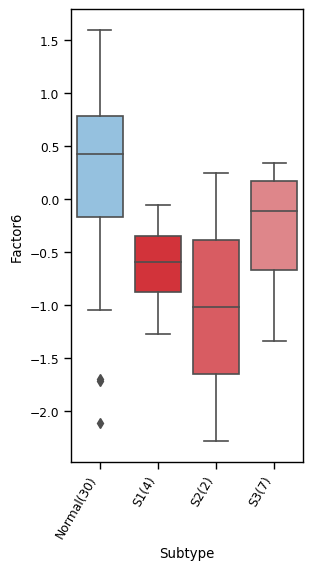

('Factor7', 0.16491482255330148, 0.18587673236587587, 0.7696979437812898)

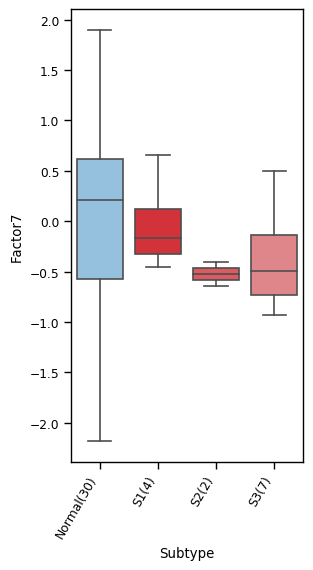

('Factor8', 1.0, 0.5707503880581739, 0.5581846494226572)

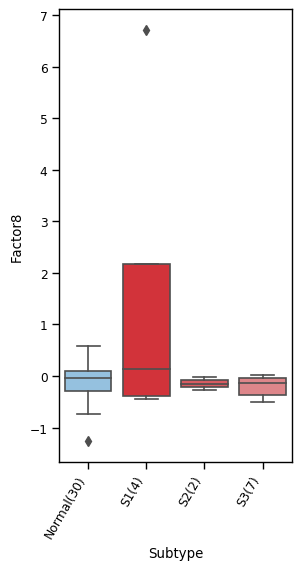

('Factor9', 0.06407750645105952, 0.037635313787314315, 0.7696979437812898)

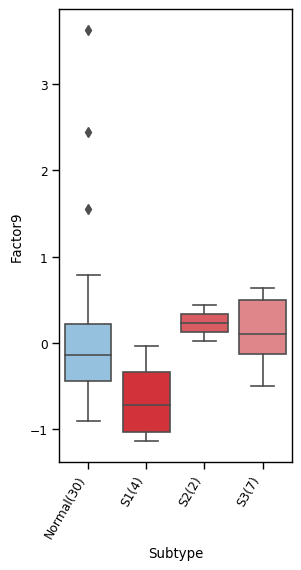

In [131]:
from scipy.stats import fisher_exact, ranksums
import statsmodels.stats.multitest as multi

result = []
colors = ['#89c3eb', '#ed1822', '#ed474f', '#ed777d', '#eda6aa']
for f in food_score.columns:
    if f=='Subtype':
        continue
    _, p12 = ranksums(food_score.loc[food_score['Subtype']=='S1', f], food_score.loc[food_score['Subtype']=='S2', f])
    _, p13 = ranksums(food_score.loc[food_score['Subtype']=='S1', f], food_score.loc[food_score['Subtype']=='S3', f])
    _, p23 = ranksums(food_score.loc[food_score['Subtype']=='S2', f], food_score.loc[food_score['Subtype']=='S3', f])
    f, p12, p13, p23
    result.append([f, (food_score['Subtype']=='Normal').sum(), (food_score['Subtype']=='S1').sum(), 
                   (food_score['Subtype']=='S2').sum(), (food_score['Subtype']=='S3').sum(), 
                   (food_score['Subtype']=='Others').sum(), food_score.loc[food_score['Subtype']=='Normal', f].mean(), 
                   food_score.loc[food_score['Subtype']=='S1', f].mean(), food_score.loc[food_score['Subtype']=='S2', f].mean(),
                   food_score.loc[food_score['Subtype']=='S3', f].mean(), food_score.loc[food_score['Subtype']=='Others', f].mean(), 
                   p12, p23, p13])
    _ = plt.figure(figsize=(3, 6), dpi=100)
    _ = sns.boxplot(x="Subtype", y=f, data=food_score, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
    _ = plt.xticks([0, 1, 2, 3],
                   ['Normal('+str((food_score['Subtype']=='Normal').sum())+')', 
                    'S1('+str((food_score['Subtype']=='S1').sum())+')', 
                    'S2('+str((food_score['Subtype']=='S2').sum())+')', 
                    'S3('+str((food_score['Subtype']=='S3').sum())+')', 
                    ], rotation=60, ha='right')
    _ = plt.show()
result = pd.DataFrame(result, columns=['Factor', 'N_nor', 'N_S1', 'N_S2', 'N_S3', 'N_Others', 
                                       'Mean_nor', 'Mean_S1', 'Mean_S2', 'Mean_S3', 'Mean_Others', 
                                       'p_S1_vs_S2', 'p_S2_vs_S3', 'p_S1_vs_S3'])

In [9]:
protein_score = pd.read_csv('../data/Preprocess/metadata_7_protein.csv', index_col=0, sep=',')
protein_score['Subtype'] = ['S1' if i in subtype1 else ('S2' if i in subtype2 else ('S3' if i in subtype3 else ('Normal' if i in normal else 'Others'))) for i in protein_score.index]
protein_score.head(2)

,FT3,FT4,TSH,FSH,LH,PRG,PRL,E2,TES,β-HCG,...,Cu,Zn,Ca,Mg,Fe,pb,Insulin,IGF,VD,Subtype
PP07_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,NaN,Others
PP66_1,6.67,15.56,2.06,3.14,0.13,0.1,9.2,14.09,2.22,1.2,...,10.7,40.2,1.41,1.25,6.99,NaN,NaN,NaN,NaN,S2


('FT3', 0.14955998111276822, 0.24303496029452298, 0.395401747198846)

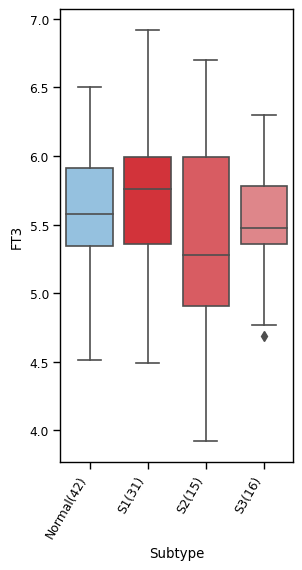

('FT4', 0.9067320114397353, 0.7447764928663247, 0.9684690548721204)

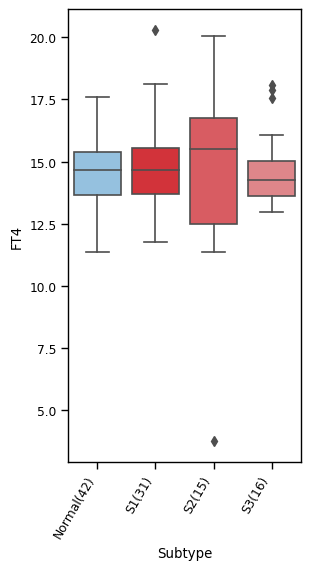

('TSH', 0.5269475087452377, 0.650767725564871, 0.6640912431229642)

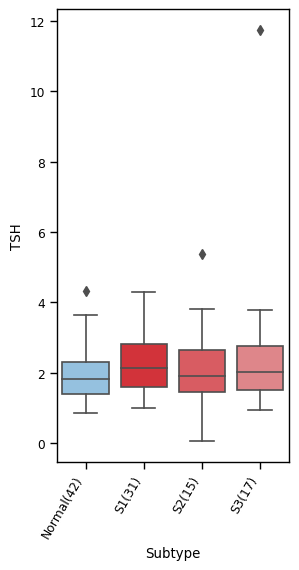

('FSH', 0.6782933410999001, 0.5518818650370179, 0.5666155213979901)

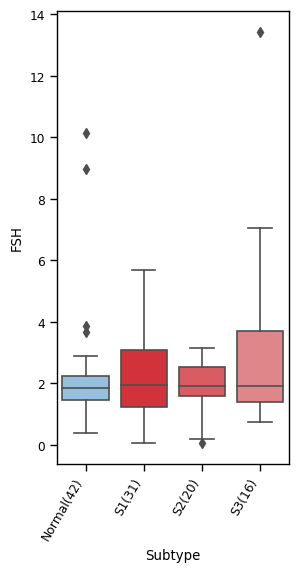

('LH', 0.02460170480599648, 0.7636310734727245, 0.13596185385464712)

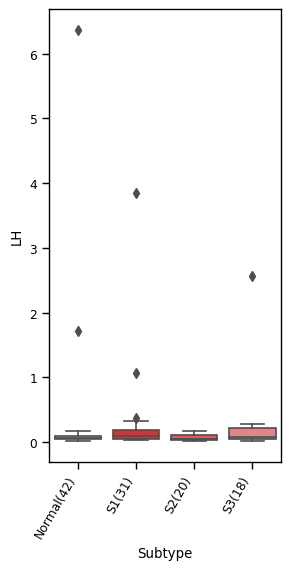

('PRG', 0.3415467356939502, 0.738279429434342, 0.2175647214455485)

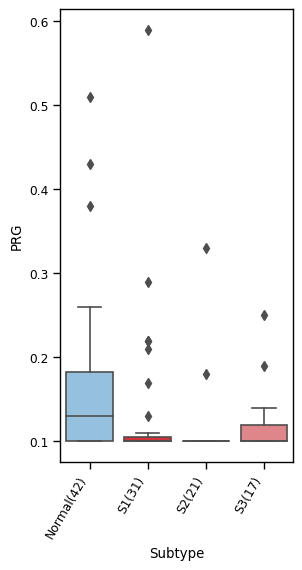

('PRL', 0.2475765862441648, 0.17104110225967362, 0.9531785579681206)

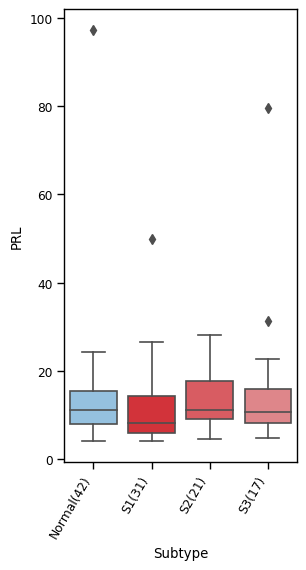

('E2', 0.4444974397912327, 0.3428720648771457, 0.1343281606497644)

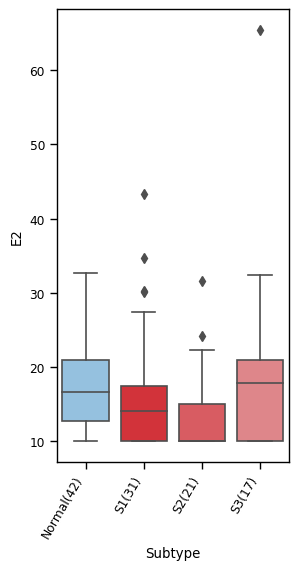

('TES', 0.006658239220719644, 0.4971100694102014, 0.09139659552186814)

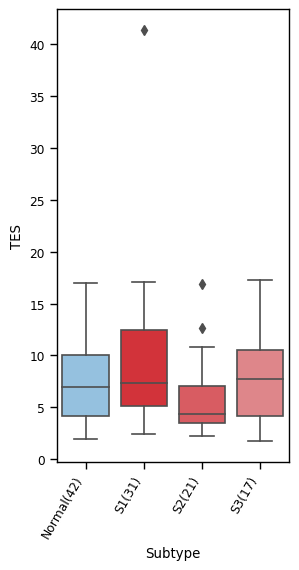

('β-HCG', 1.0, 1.0, 1.0)

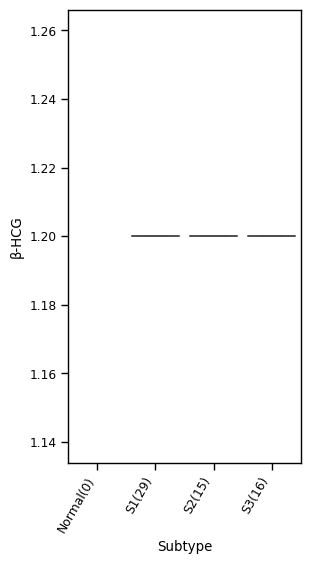

('COR', 0.24767626769189333, 0.25175949861106106, 0.026378949112931437)

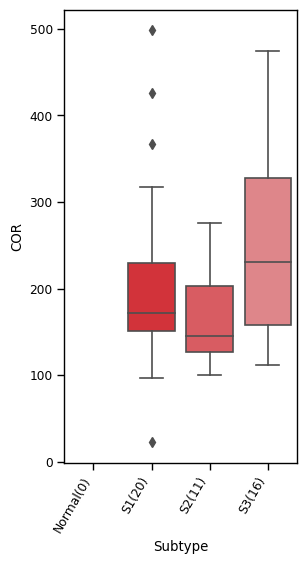

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:5760: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


('ACTH', 0.3912672792826394, nan, nan)

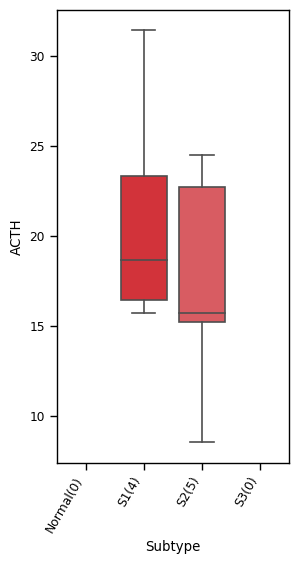

('AFP', 0.8102254271503015, 0.4006293782851791, 0.466679468654148)

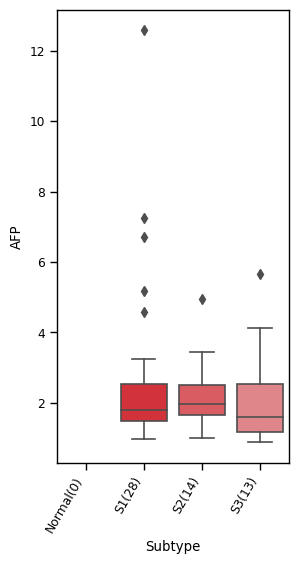

('CEA', 0.9574423794349488, 0.9888233629409615, 0.7340951823194757)

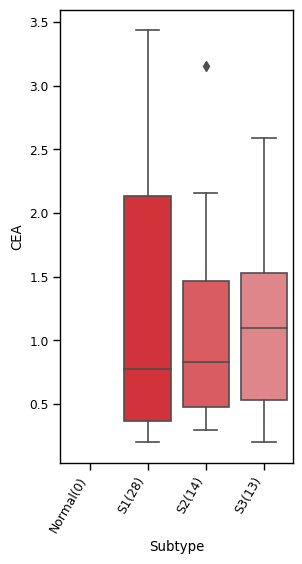

('FSH-30min', 0.8280041325090629, 0.1923794557848213, 0.20757844233562417)

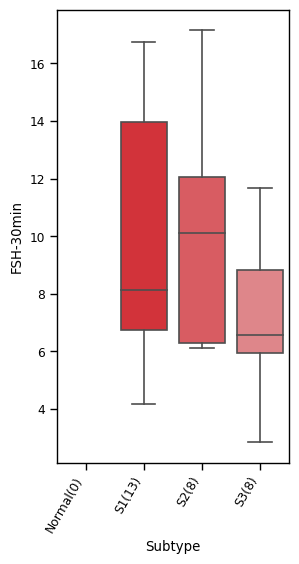

('FSH-60min', 0.2936721868476315, 0.27734175964454333, 0.07420341132975512)

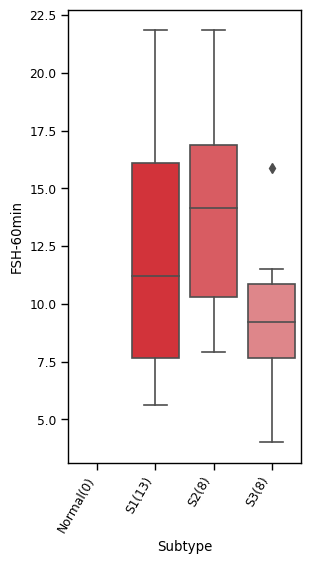

('LH/FSH-30min', 0.035711269785628066, 0.8280041325090629, 0.24799581483148547)

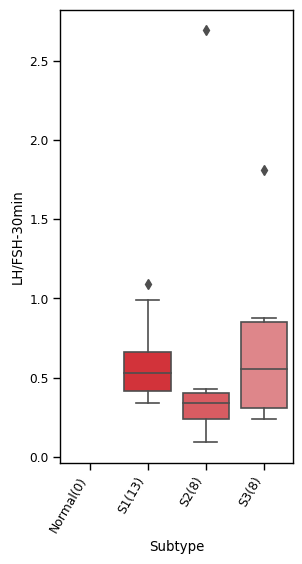

('LH/FSH-60min', 0.07021564104971324, 0.7720589697507347, 0.20757844233562417)

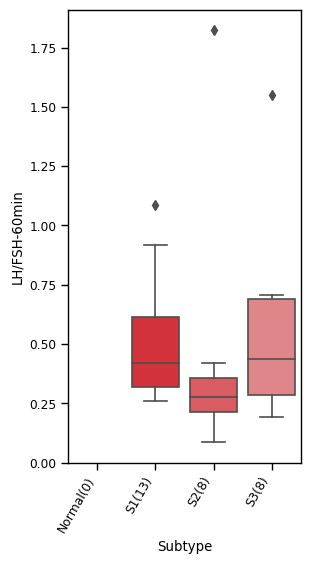

('Cu', 0.09094854576136165, 0.8025873486341526, 0.4127702336304313)

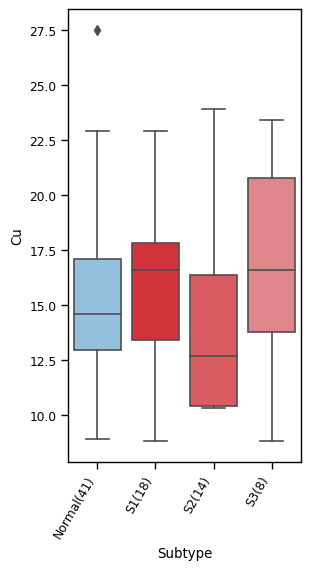

('Zn', 0.012841344139911611, 0.4874035296760253, 0.011558724303677602)

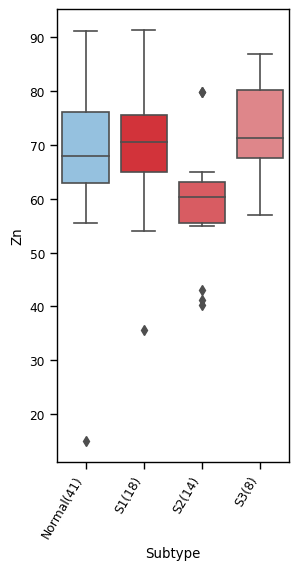

('Ca', 0.02501152559403939, 0.718016387438887, 0.04778015404017086)

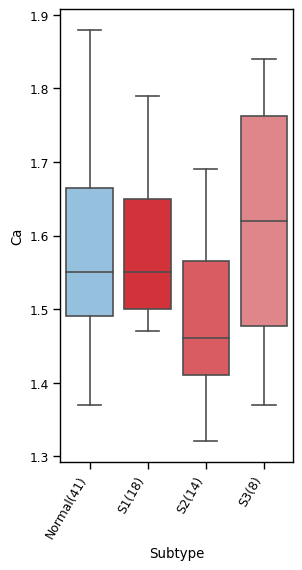

('Mg', 0.0402386771197594, 0.8025873486341526, 0.4127702336304313)

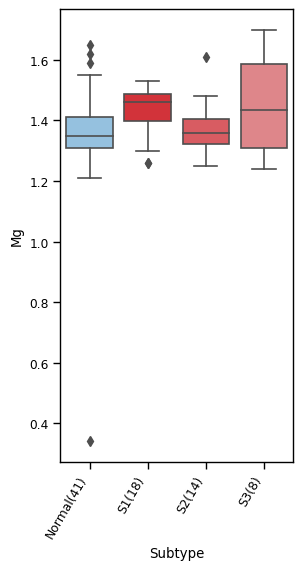

('Fe', 0.21698949564336067, 0.2323041602072643, 0.18321497894193062)

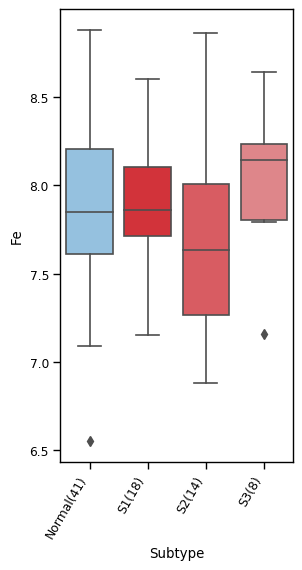

('pb', 0.4385780260809998, 0.4385780260809998, 1.0)

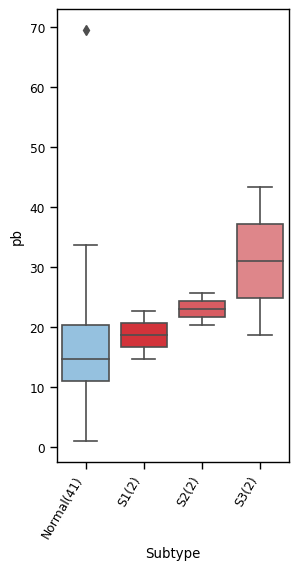

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:5760: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


('Insulin', nan, nan, nan)

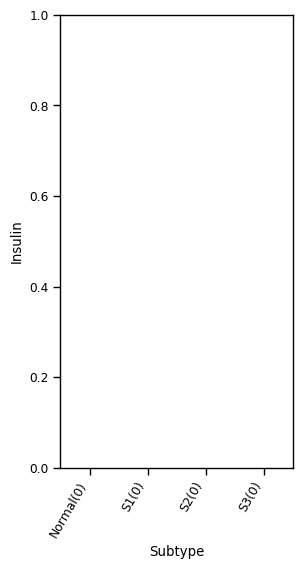

('IGF', 0.0864107329737, 0.6698153575994166, 0.06788915486182899)

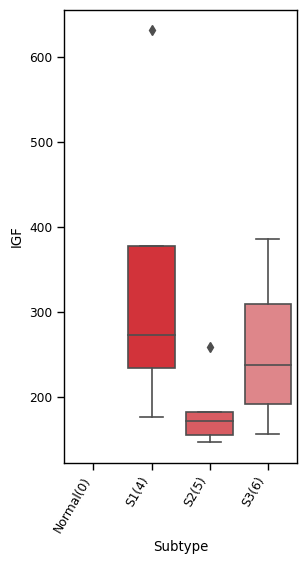

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:5760: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


('VD', nan, nan, nan)

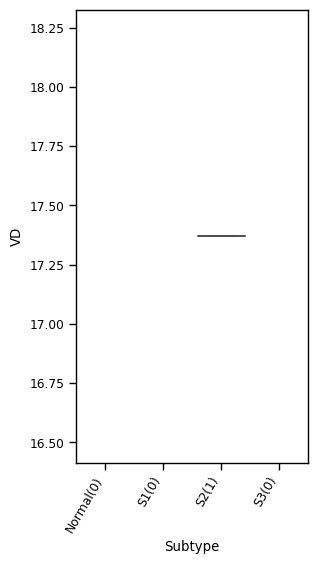

In [14]:
from scipy.stats import fisher_exact, ranksums
import statsmodels.stats.multitest as multi

result = []
colors = ['#89c3eb', '#ed1822', '#ed474f', '#ed777d', '#eda6aa']
for f in protein_score.columns:
    if f=='Subtype':
        continue
    temp = protein_score.loc[:, [f, 'Subtype']].dropna(how='any')
    _, p12 = ranksums(temp.loc[temp['Subtype']=='S1', f], temp.loc[temp['Subtype']=='S2', f])
    _, p13 = ranksums(temp.loc[temp['Subtype']=='S1', f], temp.loc[temp['Subtype']=='S3', f])
    _, p23 = ranksums(temp.loc[temp['Subtype']=='S2', f], temp.loc[temp['Subtype']=='S3', f])
    f, p12, p13, p23
    normal_set = set(temp.loc[temp['Subtype']=='Normal', f].index)-set(['N615', 'N564']) # 去除两个正常样本
    result.append([f, len(normal_set), (temp['Subtype']=='S1').sum(), 
                   (temp['Subtype']=='S2').sum(), (temp['Subtype']=='S3').sum(), 
                   (temp['Subtype']=='Others').sum(), temp.loc[normal_set, f].mean(), 
                   temp.loc[temp['Subtype']=='S1', f].mean(), temp.loc[temp['Subtype']=='S2', f].mean(),
                   temp.loc[temp['Subtype']=='S3', f].mean(), temp.loc[temp['Subtype']=='Others', f].mean(), 
                   p12, p23, p13])
    _ = plt.figure(figsize=(3, 6), dpi=100)
    _ = sns.boxplot(x="Subtype", y=f, data=temp, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
    _ = plt.xticks([0, 1, 2, 3],
                   ['Normal('+str(len(normal_set))+')', 
                    'S1('+str((temp['Subtype']=='S1').sum())+')', 
                    'S2('+str((temp['Subtype']=='S2').sum())+')', 
                    'S3('+str((temp['Subtype']=='S3').sum())+')', 
                    ], rotation=60, ha='right')
    _ = plt.show()
result = pd.DataFrame(result, columns=['Factor', 'N_nor', 'N_S1', 'N_S2', 'N_S3', 'N_Others', 
                                       'Mean_nor', 'Mean_S1', 'Mean_S2', 'Mean_S3', 'Mean_Others', 
                                       'p_S1_vs_S2', 'p_S2_vs_S3', 'p_S1_vs_S3'])
result.to_csv('subtypes/pheno_diff_in_sbutypes.csv')

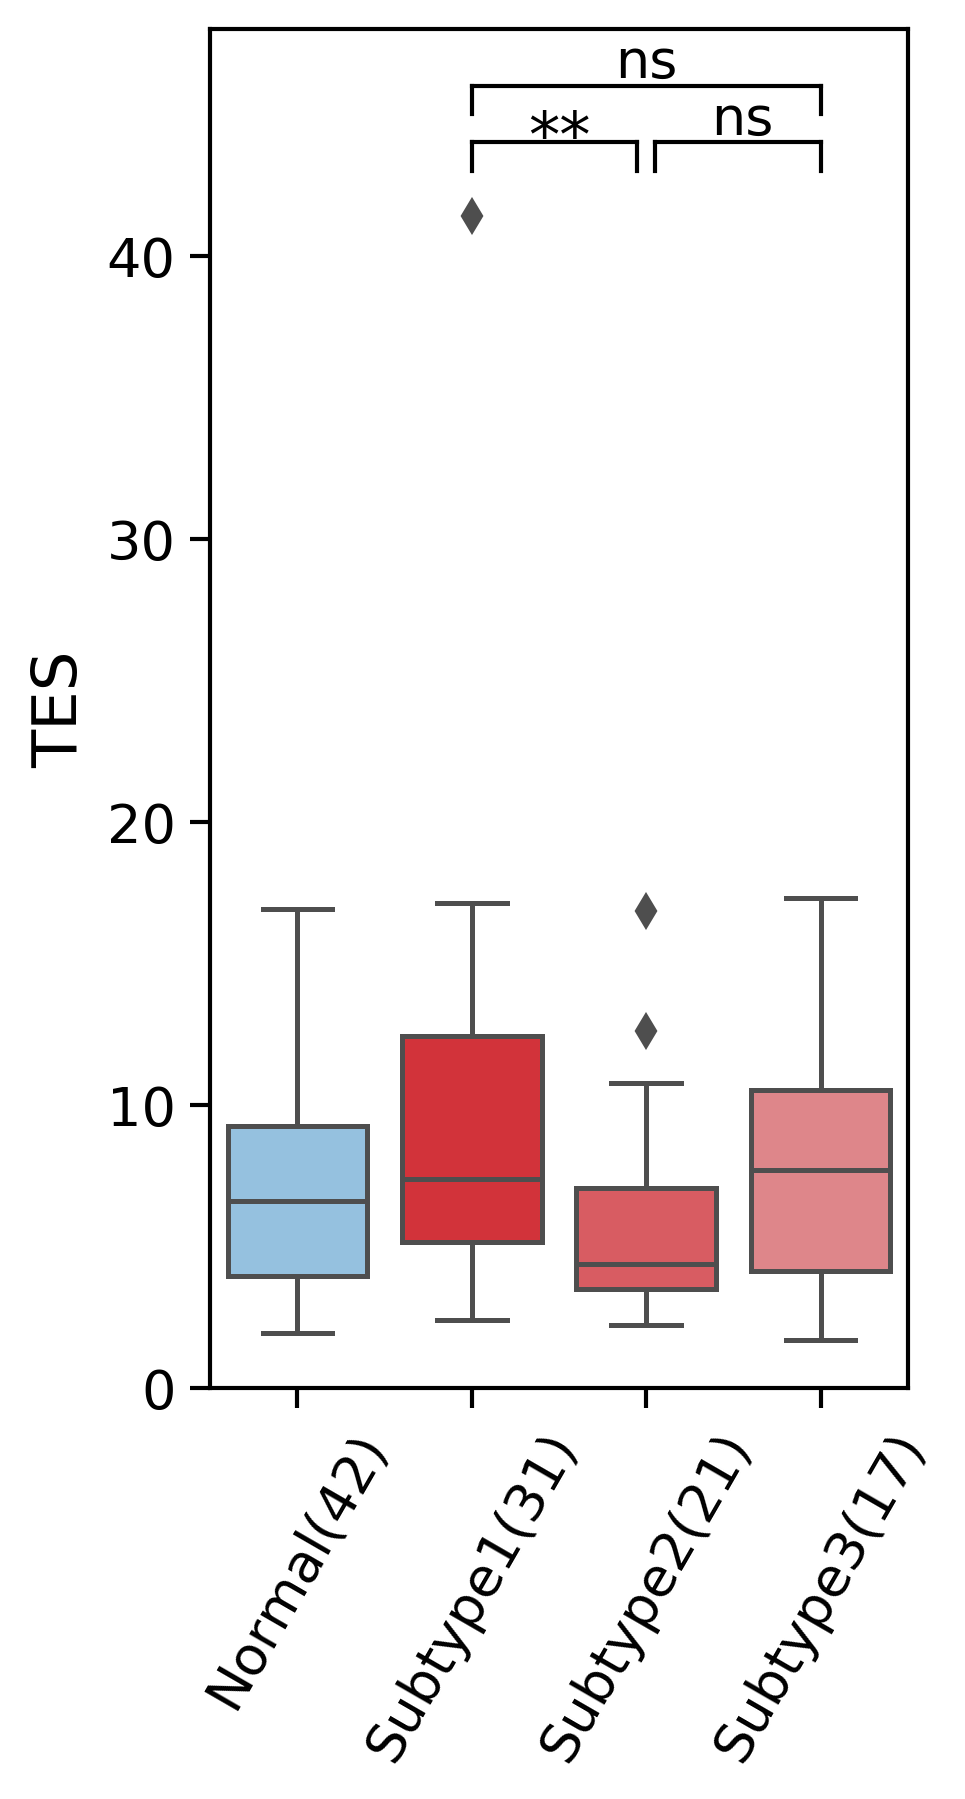

In [16]:
f = 'TES'
temp = protein_score.loc[:, [f, 'Subtype']].dropna(how='any')
temp = temp.loc[set(temp.index)-set(['N615', 'N564']), :]# 去除两个正常样本
_ = plt.figure(figsize=(3, 6), dpi=300)
_ = sns.boxplot(x="Subtype", y=f, data=temp, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
_ = plt.xticks([0, 1, 2, 3],
               ['Normal('+str(len(normal_set))+')', 
                'Subtype1('+str((temp['Subtype']=='S1').sum())+')', 
                'Subtype2('+str((temp['Subtype']=='S2').sum())+')', 
                'Subtype3('+str((temp['Subtype']=='S3').sum())+')', 
                ], rotation=60, fontsize=13)
_ = plt.yticks(fontsize = 13)
_ = plt.ylabel('TES', fontsize = 15)
_ = plt.xlabel('')

_ = plt.plot([1, 1.95], [44, 44], lw=1., c='k')
_ = plt.plot([1, 1], [43, 44], lw=1., c='k')
_ = plt.plot([1.95, 1.95], [43, 44], lw=1., c='k')
_ = plt.annotate('**', (1.5, 43.5), ha="center", fontsize=15)

_ = plt.plot([2.05, 3], [44, 44], lw=1., c='k')
_ = plt.plot([2.05, 2.05], [43, 44], lw=1., c='k')
_ = plt.plot([3, 3], [43, 44], lw=1., c='k')
_ = plt.annotate('ns', (2.55, 44.3), ha="center", fontsize=13)

_ = plt.plot([1, 3], [46, 46], lw=1., c='k')
_ = plt.plot([1, 1], [45, 46], lw=1., c='k')
_ = plt.plot([3, 3], [45, 46], lw=1., c='k')
_ = plt.annotate('ns', (2, 46.3), ha="center", fontsize=13)

_ = plt.ylim(-0, 48)
_ = plt.show()

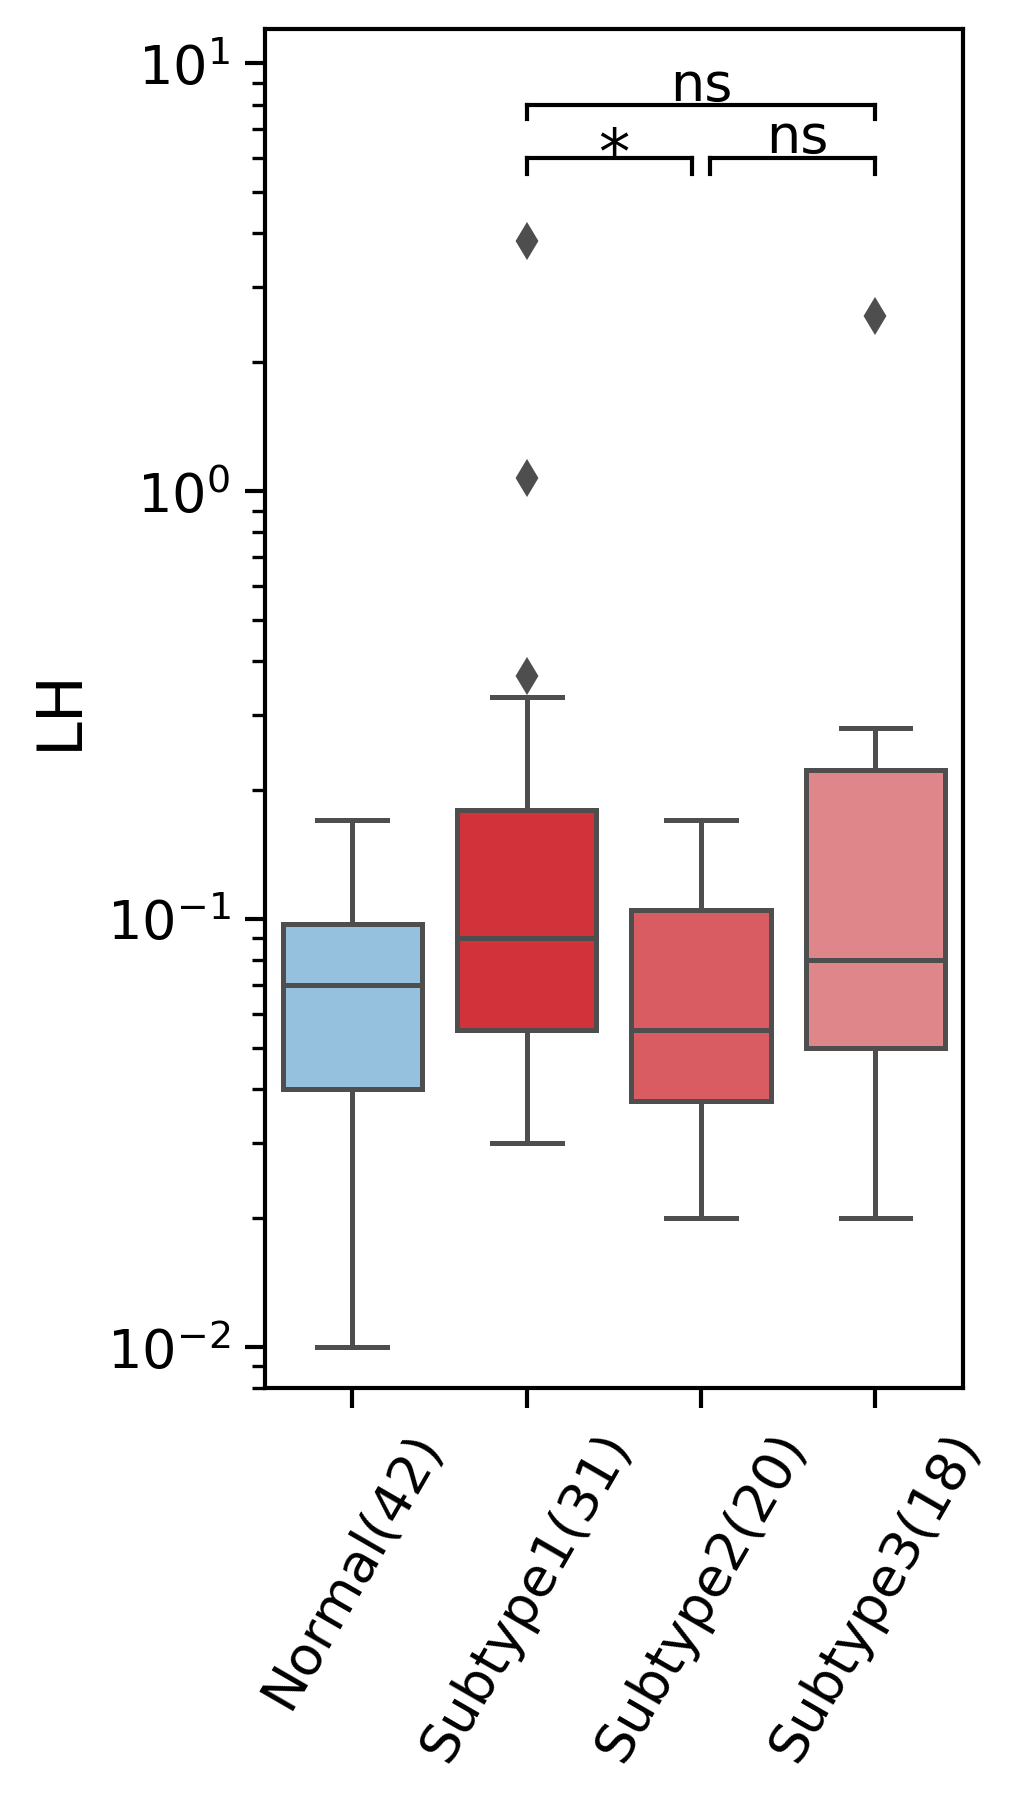

In [18]:
f = 'LH'
temp = protein_score.loc[:, [f, 'Subtype']].dropna(how='any')
temp = temp.loc[set(temp.index)-set(['N615', 'N564']), :]# 去除两个正常样本
_ = plt.figure(figsize=(3, 6), dpi=300)
_ = sns.boxplot(x="Subtype", y=f, data=temp, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
_ = plt.xticks([0, 1, 2, 3],
               ['Normal('+str((temp['Subtype']=='Normal').sum())+')', 
                'Subtype1('+str((temp['Subtype']=='S1').sum())+')', 
                'Subtype2('+str((temp['Subtype']=='S2').sum())+')', 
                'Subtype3('+str((temp['Subtype']=='S3').sum())+')', 
                ], rotation=60, fontsize=13)
_ = plt.yticks(fontsize = 13)
_ = plt.ylabel('LH', fontsize = 15)
_ = plt.xlabel('')

_ = plt.plot([1, 1.95], [6, 6], lw=1., c='k')
_ = plt.plot([1, 1], [5.5, 6], lw=1., c='k')
_ = plt.plot([1.95, 1.95], [5.5, 6], lw=1., c='k')
_ = plt.annotate('*', (1.5, 5.52), ha="center", fontsize=15)

_ = plt.plot([2.05, 3], [6, 6], lw=1., c='k')
_ = plt.plot([2.05, 2.05], [5.5, 6], lw=1., c='k')
_ = plt.plot([3, 3], [5.5, 6], lw=1., c='k')
_ = plt.annotate('ns', (2.55, 6.2), ha="center", fontsize=13)

_ = plt.plot([1, 3], [8, 8], lw=1., c='k')
_ = plt.plot([1, 1], [7.4, 8], lw=1., c='k')
_ = plt.plot([3, 3], [7.4, 8], lw=1., c='k')
_ = plt.annotate('ns', (2, 8.2), ha="center", fontsize=13)

_ = plt.ylim(0.008, 12)
_ = plt.yscale('log')
_ = plt.show()

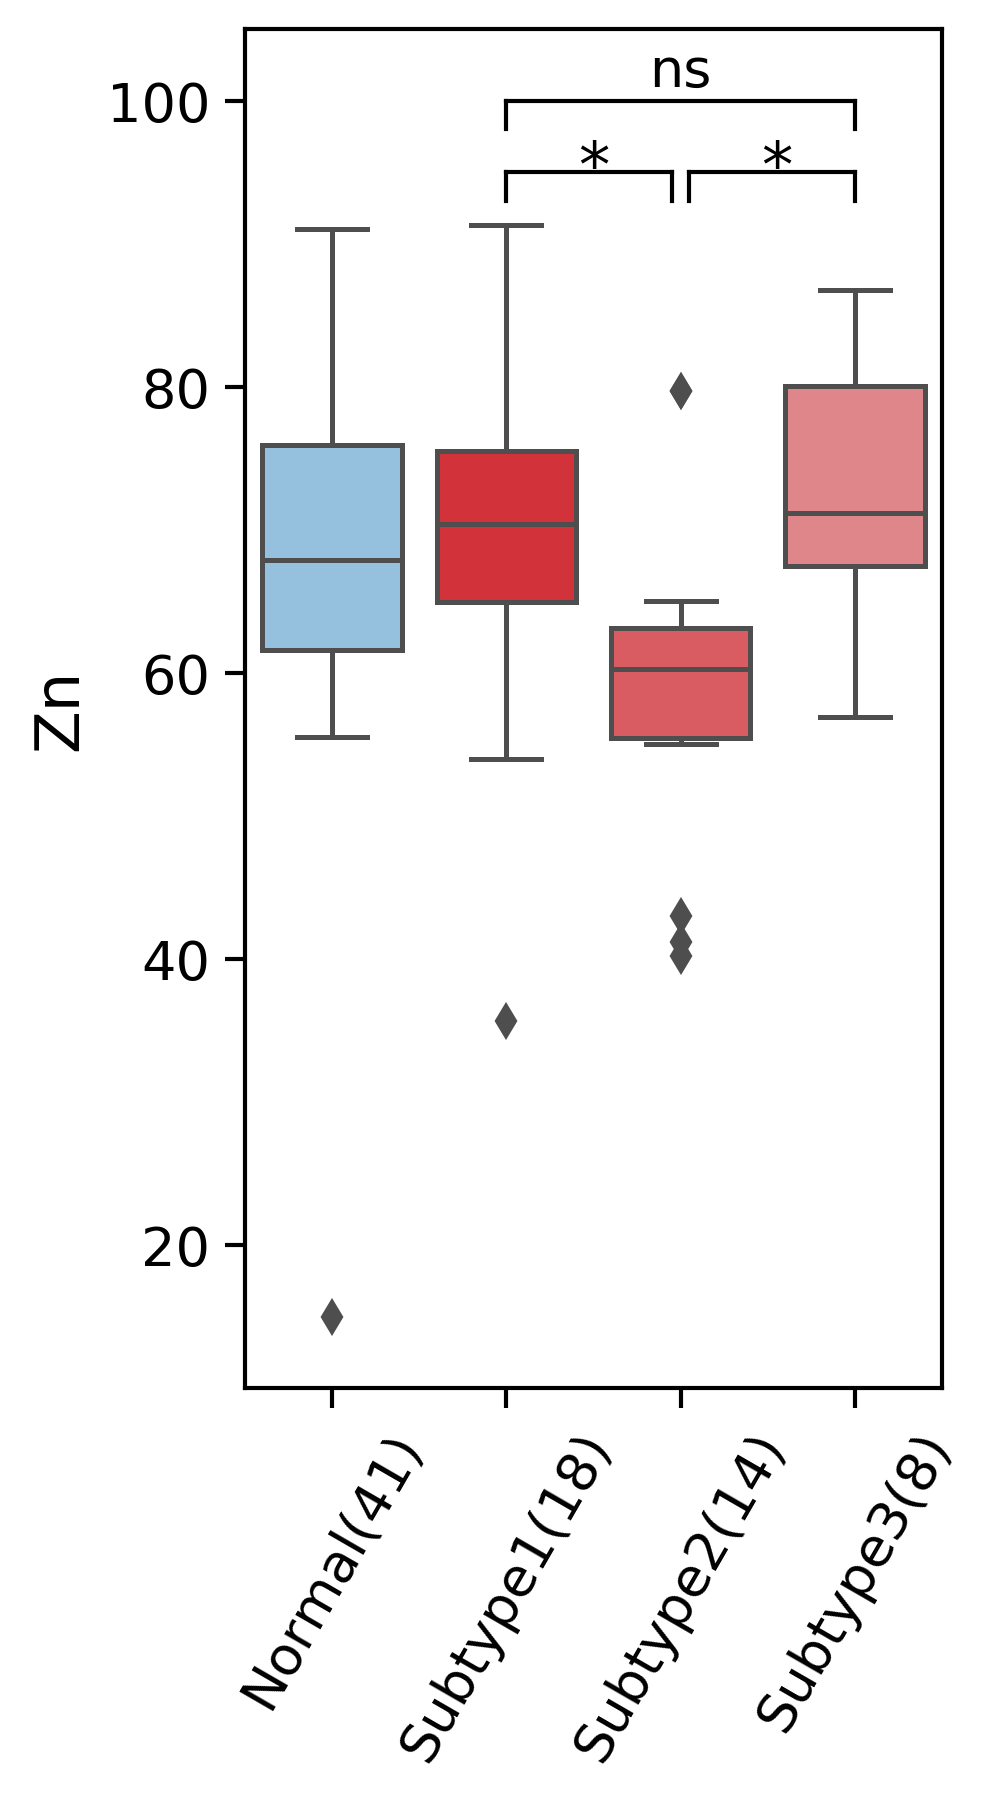

In [19]:
f = 'Zn'
temp = protein_score.loc[:, [f, 'Subtype']].dropna(how='any')
temp = temp.loc[set(temp.index)-set(['N615', 'N564']), :]# 去除两个正常样本
_ = plt.figure(figsize=(3, 6), dpi=300)
_ = sns.boxplot(x="Subtype", y=f, data=temp, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
_ = plt.xticks([0, 1, 2, 3],
               ['Normal('+str((temp['Subtype']=='Normal').sum())+')', 
                'Subtype1('+str((temp['Subtype']=='S1').sum())+')', 
                'Subtype2('+str((temp['Subtype']=='S2').sum())+')', 
                'Subtype3('+str((temp['Subtype']=='S3').sum())+')', 
                ], rotation=60, fontsize=13)
_ = plt.yticks(fontsize = 13)
_ = plt.ylabel('Zn', fontsize = 15)
_ = plt.xlabel('')

_ = plt.plot([1, 1.95], [95, 95], lw=1., c='k')
_ = plt.plot([1, 1], [93, 95], lw=1., c='k')
_ = plt.plot([1.95, 1.95], [93, 95], lw=1., c='k')
_ = plt.annotate('*', (1.5, 94), ha="center", fontsize=15)

_ = plt.plot([2.05, 3], [95, 95], lw=1., c='k')
_ = plt.plot([2.05, 2.05], [93, 95], lw=1., c='k')
_ = plt.plot([3, 3], [93, 95], lw=1., c='k')
_ = plt.annotate('*', (2.55, 94), ha="center", fontsize=15)

_ = plt.plot([1, 3], [100, 100], lw=1., c='k')
_ = plt.plot([1, 1], [98, 100], lw=1., c='k')
_ = plt.plot([3, 3], [98, 100], lw=1., c='k')
_ = plt.annotate('ns', (2, 101), ha="center", fontsize=13)

_ = plt.ylim(10, 105)
#_ = plt.yscale('log')
_ = plt.show()

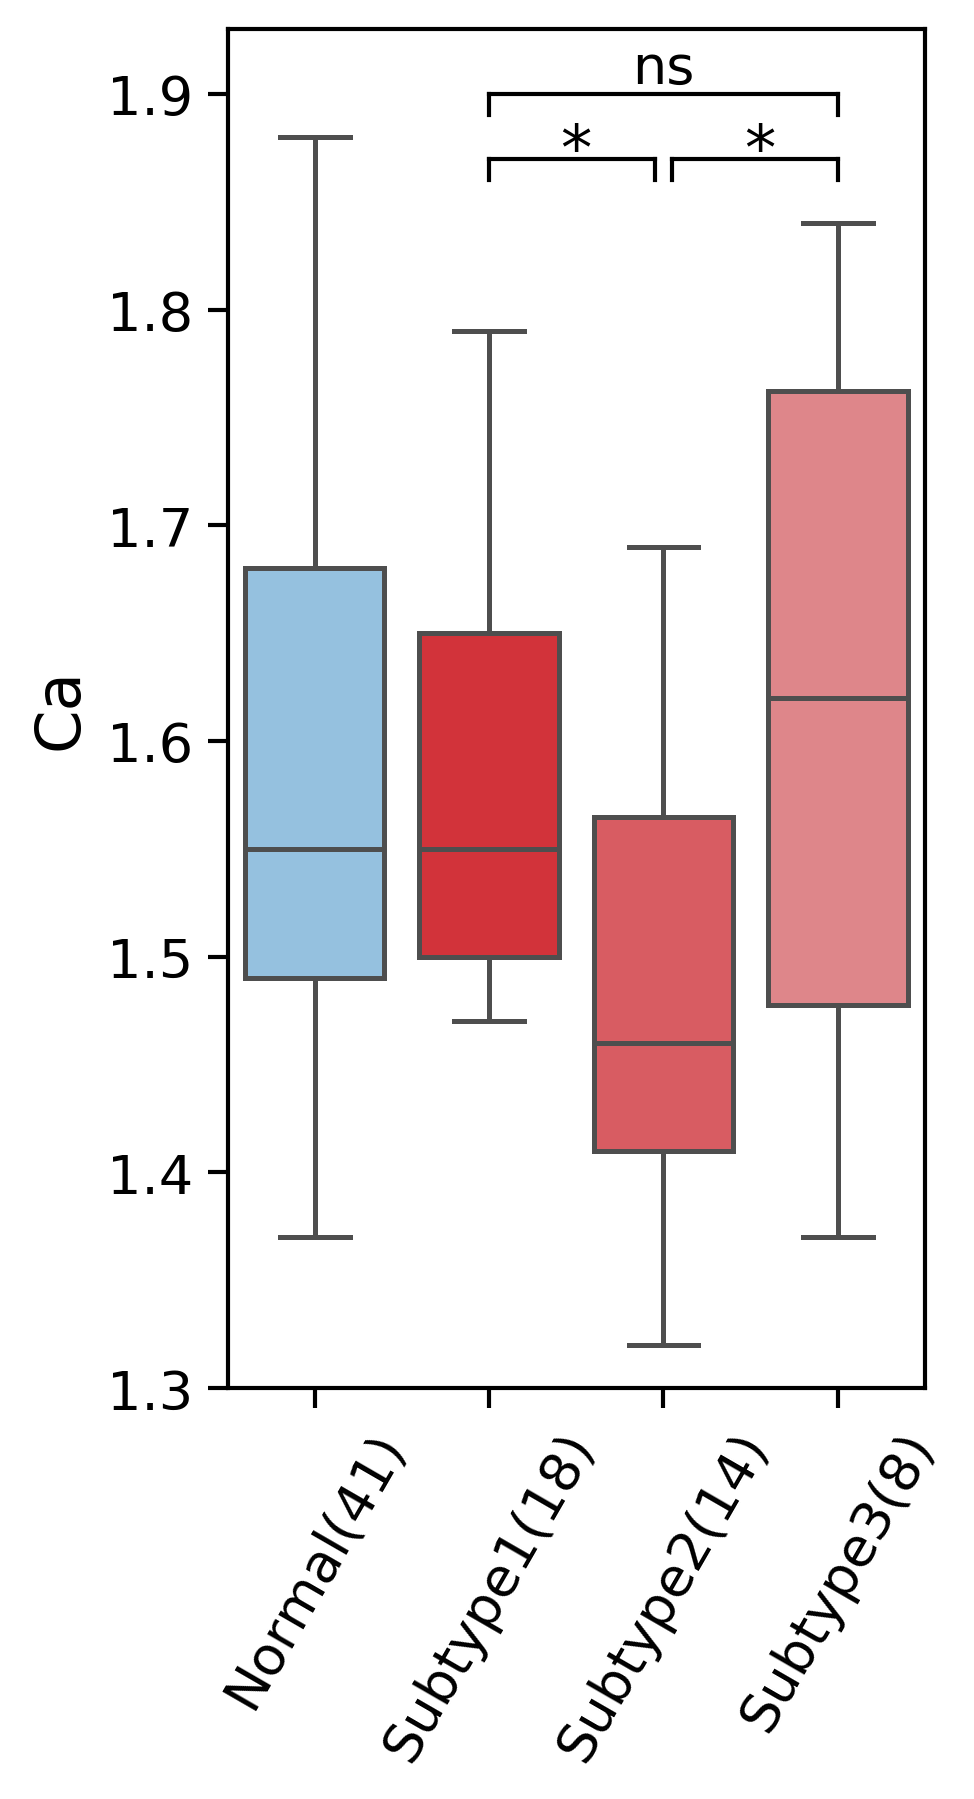

In [20]:
f = 'Ca'
temp = protein_score.loc[:, [f, 'Subtype']].dropna(how='any')
temp = temp.loc[set(temp.index)-set(['N615', 'N564']), :]# 去除两个正常样本
_ = plt.figure(figsize=(3, 6), dpi=300)
_ = sns.boxplot(x="Subtype", y=f, data=temp, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
_ = plt.xticks([0, 1, 2, 3],
               ['Normal('+str((temp['Subtype']=='Normal').sum())+')', 
                'Subtype1('+str((temp['Subtype']=='S1').sum())+')', 
                'Subtype2('+str((temp['Subtype']=='S2').sum())+')', 
                'Subtype3('+str((temp['Subtype']=='S3').sum())+')', 
                ], rotation=60, fontsize=13)
_ = plt.yticks(fontsize = 13)
_ = plt.ylabel('Ca', fontsize = 15)
_ = plt.xlabel('')

_ = plt.plot([1, 1.95], [1.87, 1.87], lw=1., c='k')
_ = plt.plot([1, 1], [1.86, 1.87], lw=1., c='k')
_ = plt.plot([1.95, 1.95], [1.86, 1.87], lw=1., c='k')
_ = plt.annotate('*', (1.5, 1.865), ha="center", fontsize=15)

_ = plt.plot([2.05, 3], [1.87, 1.87], lw=1., c='k')
_ = plt.plot([2.05, 2.05], [1.86, 1.87], lw=1., c='k')
_ = plt.plot([3, 3], [1.86, 1.87], lw=1., c='k')
_ = plt.annotate('*', (2.55, 1.865), ha="center", fontsize=15)

_ = plt.plot([1, 3], [1.9, 1.9], lw=1., c='k')
_ = plt.plot([1, 1], [1.89, 1.9], lw=1., c='k')
_ = plt.plot([3, 3], [1.89, 1.9], lw=1., c='k')
_ = plt.annotate('ns', (2, 1.905), ha="center", fontsize=13)

_ = plt.ylim(1.3, 1.93)
#_ = plt.yscale('log')
_ = plt.show()

In [10]:
from scipy.stats import fisher_exact, ranksums
import statsmodels.stats.multitest as multi

In [13]:
phenotype_data = pd.read_csv('../data/Preprocess/metadata_8_phenotype.csv', index_col=0, sep=',')
phenotype_data['Subtype'] = ['S1' if i in subtype1 else ('S2' if i in subtype2 else ('S3' if i in subtype3 else ('Normal' if i in normal else 'Others'))) for i in phenotype_data.index]
phenotype_data.head()

,Uterine volume,Right ovarian volume,Follicles above 0.4cm(right),Follicles max(right),Left ovarian volume,Follicles above 0.4cm(left),Follicles max(left),Right breast volume,Left breast volume,Breast development,Bone age,Bone age diagnosis,Menstruation,Subtype
PP07_1,0.691152,2.770368,5.0,0.6,2.937396,2.0,NaN,NaN,NaN,NaN,10.9,1.0,0.0,Others
PP66_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.973972,2.638944,NaN,NaN,NaN,NaN,S2
PP49_1,1.484406,0.980179,2.0,0.5,0.980179,0.0,0.0,10.555776,2.023190,1.0,8.8,NaN,0.0,S1
PP119_1,1.048247,2.111155,0.0,NaN,20.158600,0.0,NaN,2.528988,2.940538,1.0,7.9,1.0,0.0,Others
PP161_1,0.626749,1.422621,0.0,0.0,2.764608,0.0,0.0,2.618000,0.961330,1.0,9.4,1.0,0.0,S3


('Uterine volume', 0.32696466968888227, 0.5499800321198041, 0.9029747362022654)

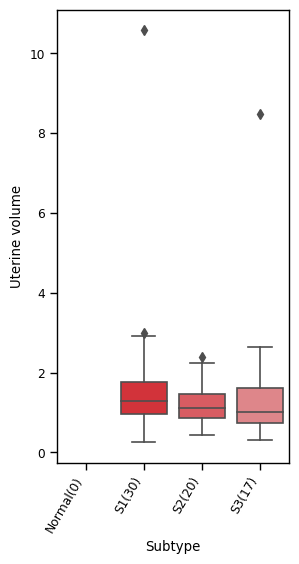

('Right ovarian volume',
 0.18457560900431913,
 0.5065551690490403,
 0.6366559168678492)

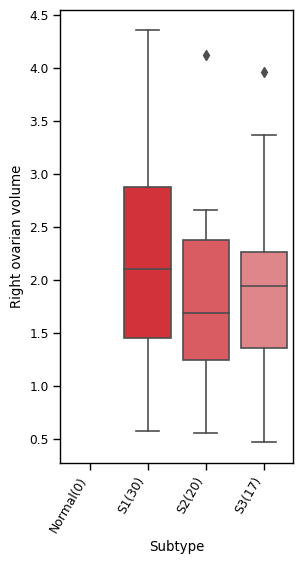

('Follicles above 0.4cm(right)',
 0.5327635688365302,
 0.8808345795495283,
 0.5037824063617619)

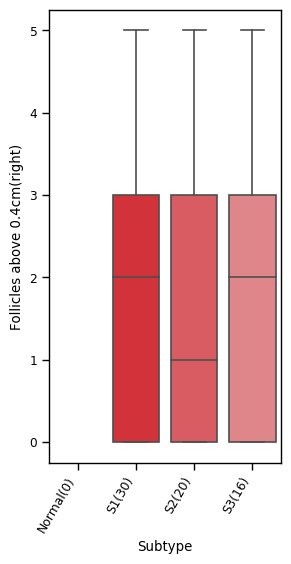

('Follicles max(right)',
 0.5604442739198832,
 0.31797617698154956,
 0.7209062417708142)

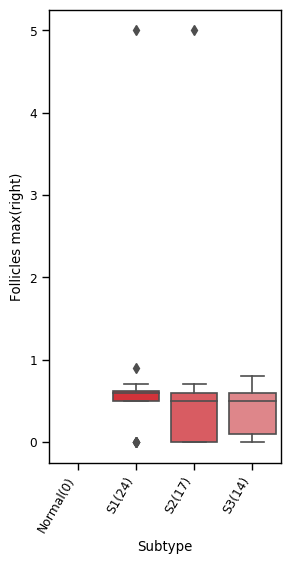

('Left ovarian volume',
 0.9289918843711301,
 0.1265905978294308,
 0.15203606544822412)

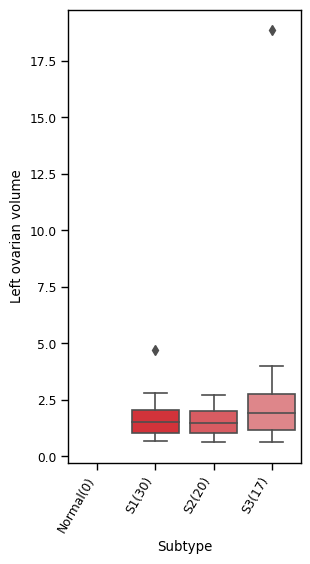

('Follicles above 0.4cm(left)',
 0.6345939543014978,
 0.16291681596456753,
 0.25175949861106106)

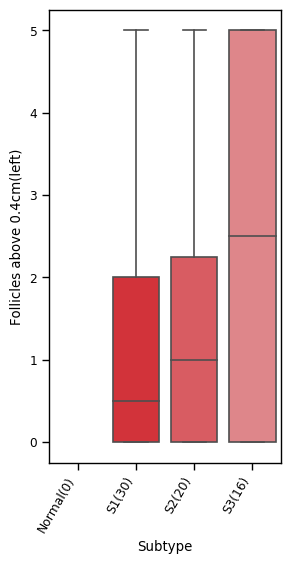

('Follicles max(left)',
 0.9871995299151541,
 0.6615800118849622,
 0.6944729643203018)

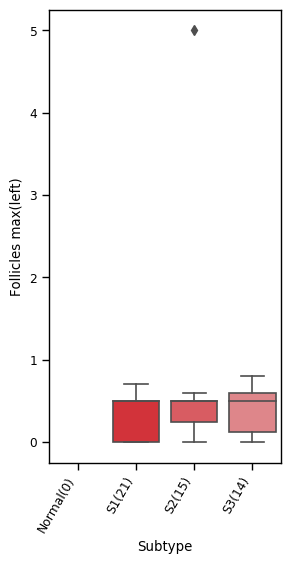

('Right breast volume',
 0.24976384486009684,
 0.7260916265043434,
 0.08859793326573018)

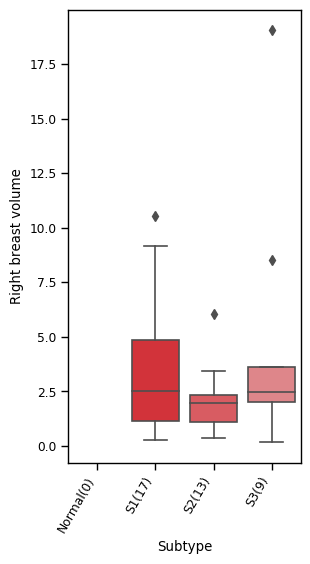

('Left breast volume',
 0.24443398503429636,
 0.4259831165449188,
 0.06052631911390806)

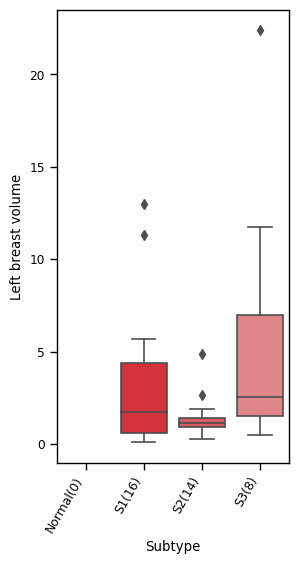

('Breast development',
 0.937947456842939,
 0.6713732405408726,
 0.7491191330005953)

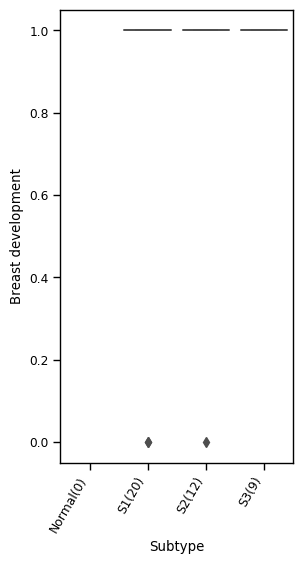

('Bone age', 0.7143930376343264, 0.699295928807816, 0.8009225299577449)

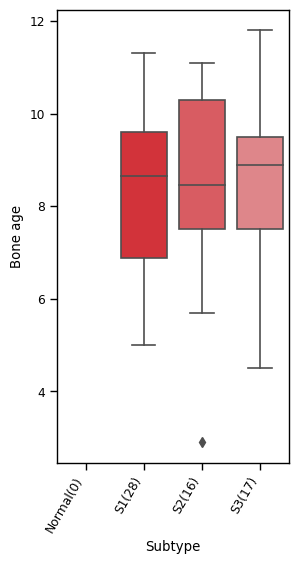

('Bone age diagnosis',
 0.2113750381491506,
 0.4629453063037178,
 0.5327473782446904)

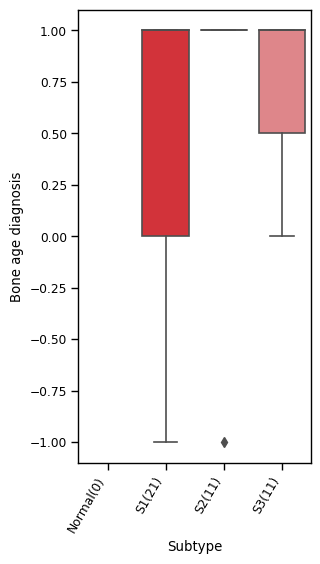

('Menstruation', 1.0, 1.0, 1.0)

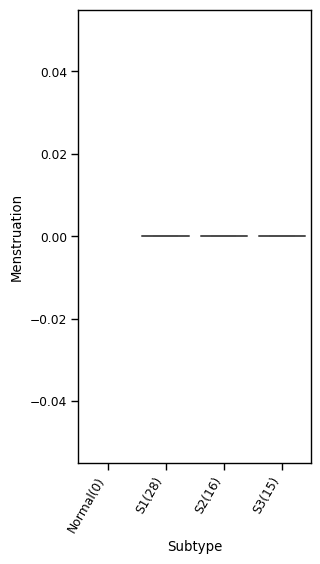

In [16]:
result = []
colors = ['#89c3eb', '#ed1822', '#ed474f', '#ed777d', '#eda6aa']
for f in phenotype_data.columns:
    if f=='Subtype':
        continue
    temp = phenotype_data.loc[:, [f, 'Subtype']].dropna(how='any')
    _, p12 = ranksums(temp.loc[temp['Subtype']=='S1', f], temp.loc[temp['Subtype']=='S2', f])
    _, p13 = ranksums(temp.loc[temp['Subtype']=='S1', f], temp.loc[temp['Subtype']=='S3', f])
    _, p23 = ranksums(temp.loc[temp['Subtype']=='S2', f], temp.loc[temp['Subtype']=='S3', f])
    f, p12, p13, p23
    normal_set = set(temp.loc[temp['Subtype']=='Normal', f].index)-set(['N615', 'N564']) # 去除两个正常样本
    result.append([f, len(normal_set), (temp['Subtype']=='S1').sum(), 
                   (temp['Subtype']=='S2').sum(), (temp['Subtype']=='S3').sum(), 
                   (temp['Subtype']=='Others').sum(), temp.loc[normal_set, f].mean(), 
                   temp.loc[temp['Subtype']=='S1', f].mean(), temp.loc[temp['Subtype']=='S2', f].mean(),
                   temp.loc[temp['Subtype']=='S3', f].mean(), temp.loc[temp['Subtype']=='Others', f].mean(), 
                   p12, p23, p13])
    _ = plt.figure(figsize=(3, 6), dpi=100)
    _ = sns.boxplot(x="Subtype", y=f, data=temp, order=['Normal', 'S1', 'S2', 'S3'], palette=colors)
    _ = plt.xticks([0, 1, 2, 3],
                   ['Normal('+str(len(normal_set))+')', 
                    'S1('+str((temp['Subtype']=='S1').sum())+')', 
                    'S2('+str((temp['Subtype']=='S2').sum())+')', 
                    'S3('+str((temp['Subtype']=='S3').sum())+')', 
                    ], rotation=60, ha='right')
    _ = plt.show()
result = pd.DataFrame(result, columns=['Factor', 'N_nor', 'N_S1', 'N_S2', 'N_S3', 'N_Others', 
                                       'Mean_nor', 'Mean_S1', 'Mean_S2', 'Mean_S3', 'Mean_Others', 
                                       'p_S1_vs_S2', 'p_S2_vs_S3', 'p_S1_vs_S3'])
result.to_csv('subtypes/phenotype_diff_in_sbutypes.csv')